In [1]:
%pip install seaborn
%pip install scikit-learn
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install lifelines
%pip install Jinja2
%pip install scipy

# Beyond the Box Score: Analyzing the Key Predictors of Career Longevity in Major League Baseball Hitters

# Permissions

Place an **X** in the appropriate bracket below to specify if you would like your group's project to be made available to the public.  
(Note that student names will be included, but PIDs will be scraped from any groups who include their PIDs).

- [X] **YES** - make available  
- [ ] **NO** - keep private  

# Names

- Hridyanshu
- Ellie Park
- Lucas Kugel
- Beomsuk Seo

# Abstract

Comprehending career length in Major League Baseball (MLB) is essential for players, organizations, and analysts aiming to enhance performance and inform decision-making.  This study examines the principal determinants affecting a hitter's career duration, emphasizing debut age, performance patterns, talent specialization, and statistical consistency.  Previous studies have demonstrated that early professional success and robust plate discipline enhance career longevity; nonetheless, there are still deficiencies in forecasting career trajectories through advanced analytical techniques.

To tackle this issue, we performed a comprehensive exploratory data analysis (EDA), survival analysis, and machine learning modeling utilizing publicly accessible MLB player biographical and performance data.  Our investigation investigated the correlation between important performance variables, including Wins Above Replacement (WAR), On-Base Percentage (OBP), and strikeout rates (K%), and career longevity.  We utilized Kaplan-Meier survival curves and Cox Proportional Hazards models to assess the likelihood of career persistence based on various player attributes.  Furthermore, machine learning models (Random Forest, XGBoost) were employed to forecast career duration based on player statistics.

Our data indicate that debuting at a younger age correlates with extended career longevity; players who debut prior to age 20 average nearly 11 years in the league, but those who debut at age 28 or older often last only 2-3 years.  Players exhibiting elevated on-base percentages (OBP) and walk rates (BB%) generally enjoy lengthier careers compared to those with high strikeout rates (K%), underscoring the significance of plate discipline for career longevity.  Survival study corroborated these results, demonstrating that WAR and OBP are robust indicators of career longevity, but a high K% markedly elevates the probability of premature retirement.

This study builds upon previous research by combining conventional baseball statistics with sophisticated machine learning methodologies to enhance the comprehension of the determinants influencing career length among MLB hitters.  The conclusions derived from this analysis possess practical ramifications for scouting, contract negotiations, and player development plans.  Subsequent research ought to include supplementary variables, including injury history, defensive contributions, and socio-economic aspects, to develop a more holistic model for career prediction.

# Research Question

How do different aging patterns affect Major League Baseball hitters' career lengths, performance stability, and longevity across various skill types?

## Specific Subquestions:

**Career Length and Age Trends:** How does debut age correlate with career length? Is there a typical age range for MLB hitters' retirement? How does the distribution of career lengths vary by debut age?

**Performance Trends Over Career:** How do key performance metrics (HR, wOBA, WAR, OBP) change with age? At what age do players typically reach peak performance? How does performance decline as players approach retirement?

**Skill Specialization and Longevity:** Do power hitters (high HR & ISO) have longer or shorter careers than contact hitters (high AVG & OBP)? Do players with higher walk rates (BB%) age better than those with high strikeout rates (K%)? How does WAR change over time for different player profiles?

**Performance Stability & Consistency:** How does year-to-year variance in performance metrics change with age? Are there common aging trajectories among players with longer careers vs. shorter careers? What statistical indicators best predict longevity in the league?

## Background and Prior Work

The concept of career longevity in professional sports has been widely studied across different leagues, as teams and analysts seek to understand the factors that contribute to sustained success. In baseball, age-related decline and skill specialization are key factors influencing career duration. Players who excel in multiple areas, such as on-base skills and defensive contributions, may have longer careers than those who rely primarily on power hitting.

Prior research on MLB player aging curves has indicated that offensive production tends to peak in the late 20s, with declines occurring in the early 30s. A study conducted by Silver (2006) analyzed historical player performance and found that WAR stabilizes in a player's prime years before dropping rapidly.<sup>[1](#ref1)</sup> Additionally, an article from FanGraphs suggests that players with higher on-base percentages (OBP) and lower strikeout rates (K%) tend to maintain value longer than power hitters.<sup>[2](#ref2)</sup>

Furthermore, there has been extensive discussion about the role of plate discipline in career longevity. Research from Baseball Prospectus has shown that players with higher BB% (walk rates) tend to remain productive later in their careers, as patience at the plate compensates for physical decline.<sup>[3](#ref3)</sup> In contrast, players who rely heavily on power (ISO) may experience steeper declines, as bat speed and reaction time diminish with age.

Given the importance of these factors, this study aims to extend previous research by identifying which statistical indicators are most predictive of long MLB careers and how different skill profiles impact longevity.

## References

<a name="ref1"></a>[1] Silver, N. (2006). The Aging Curve in Major League Baseball. *Baseball Think Factory*. Retrieved from [https://www.baseballthinkfactory.org](https://www.baseballthinkfactory.org)  

<a name="ref2"></a>[2] FanGraphs. (2020). How MLB Hitters Age and Decline Over Time. Retrieved from [https://www.fangraphs.com](https://www.fangraphs.com)  

<a name="ref3"></a>[3] Baseball Prospectus. (2019). Plate Discipline and Career Longevity in MLB. Retrieved from [https://www.baseballprospectus.com](https://www.baseballprospectus.com)  

## Hypothesis

We hypothesize that MLB hitters who debut at a younger age will have longer careers on average, as early-career players receive more development opportunities and time to refine their skills. Additionally, players with high on-base percentages (OBP) and strong plate discipline (BB%) will exhibit greater career longevity than those who rely primarily on power hitting (high ISO, HR rates), as plate discipline helps sustain offensive value even as physical abilities decline. We also predict that WAR will be a strong predictor of career longevity, while high strikeout rates (K%) may negatively impact career length. This study aims to identify the key statistical factors influencing career duration and whether skill specialization plays a role in sustaining long MLB careers.

# Data

## Data Overview

## Dataset #1: Player Biographical Data

- **Dataset Name:** `People (2).csv`
- **Link to the Dataset:** https://drive.google.com/drive/folders/1erLSDZmYdCX56R4zulhXMxzQFtw7UrU-?usp=sharing
- **Number of Observations (After Cleaning):** 21010
- **Number of Variables:** 25

### Description:
This dataset contains biographical details of MLB players, including birthdate, death date (if applicable), debut and final game dates, height, weight, and handedness (batting & throwing).

### Key Variables Used:
- **`debutAge`** – The age at which a player made their MLB debut.
- **`retirementAge`** – The age at which a player played their last MLB game.
- **`careerLength`** – The number of years between debut and final game.
- **`currentAge`** – Players' current age as of March 9, 2025, or their age at death if applicable.

### Why We Applied Age Restrictions?
Removed players with a retirement age over 50 → MLB players rarely play beyond this age, ensuring we focus on realistic career trends.  
Ensured no player debuted before age 16 → MLB rules prohibit such early debuts.  
Filtered out historical anomalies → Many older records (from the 1800s and early 1900s) contained incomplete or inconsistent career data.  

## Dataset #2: Fangraphs Batting Performance Data

- **Dataset Name:** `fangraphs-batting (1).csv`
- **Link to the Dataset:** https://drive.google.com/drive/folders/1erLSDZmYdCX56R4zulhXMxzQFtw7UrU-?usp=sharing
- **Number of Observations (After Cleaning):** 4450
- **Number of Variables:** 25

### Description:
This dataset contains offensive performance metrics for MLB hitters, including:

- **Raw Statistics:** Home Runs (HR), Runs (R), Runs Batted In (RBI), Plate Appearances (PA), Stolen Bases (SB).
- **Advanced Metrics:** Wins Above Replacement (WAR), Weighted On-Base Average (wOBA), Isolated Power (ISO).
- **Plate Discipline:** Walk Rate (BB%), Strikeout Rate (K%).

### Why We Applied Player Name Matching?
Since Fangraphs and Lahman databases use different player IDs, we merged them using player names (nameFirst + nameLast → FullName). We kept only exact matches, ensuring our dataset contains only hitters with verified career data.

## Data Cleaning & Processing Steps

### 1. Merging Biographical & Performance Data
Since player IDs did not match across datasets, we matched records using full player names and filtered out unverified or mismatched records, ensuring accuracy.

### 2. Handling Age & Career Length Calculations
Ensured all career-related statistics were correctly computed:

- **`debutAge`** = debut date - birth date  
- **`retirementAge`** = final game date - birth date  
- **`careerLength`** = final game year - debut year  
- **`currentAge`** = as of March 9, 2025, unless the player is deceased.  

#### Filtered Out Unrealistic Values:
Removed players with `currentAge` > 50 → Ensures aging patterns reflect realistic playing careers.  
Ensured no `debutAge` < 16 → MLB does not allow players to debut this young.  
Checked that all `careerLength` values were positive → Avoided incorrect final game dates.  

### 3. Categorizing Players Based on Performance Metrics
To analyze performance trends, we classified hitters into groups:

#### **Hitter Type (Power vs. Contact vs. Balanced)**
- **Power Hitters** = Above median HR & ISO  
- **Contact Hitters** = Above median AVG & OBP  
- **Balanced** = Neither power nor contact dominant  

#### **Plate Discipline Type (High BB% vs. High K%)**
- **High BB% (Walk Rate) Hitters** = Above median BB%  
- **High K% (Strikeout Rate) Hitters** = Above median K%  

## Final Dataset: Cleaned and Merged MLB Data

- **Dataset Name:** `cleaned_mlb_players_data.csv`
- **Link to the Dataset:** https://drive.google.com/drive/folders/1erLSDZmYdCX56R4zulhXMxzQFtw7UrU-?usp=sharing 
- **Number of Observations (After Cleaning):** 948
- **Number of Variables:** 24

## Combined Code for Cleaning the Datasets


In [2]:
import pandas as pd
from datetime import datetime

reference_date = datetime(2025, 3, 9)
file1_path = "People (2).csv"  
file2_path = "fangraphs-batting (1).csv"  
df_people = pd.read_csv(file1_path, encoding="latin1")
df_fangraphs = pd.read_csv(file2_path, encoding="latin1")

df_fangraphs.rename(columns={df_fangraphs.columns[0]: "Name"}, inplace=True)

df_people["FullName"] = df_people["nameFirst"] + " " + df_people["nameLast"]

df_merged = df_fangraphs.merge(df_people, left_on="Name", right_on="FullName", how="left")

for col in ["birthYear", "birthMonth", "birthDay", "deathYear", "deathMonth", "deathDay"]:
    df_merged[col] = pd.to_numeric(df_merged[col], errors="coerce")

df_merged["debut"] = pd.to_datetime(df_merged["debut"], errors="coerce")
df_merged["finalGame"] = pd.to_datetime(df_merged["finalGame"], errors="coerce")

# Ensuring numeric conversion and handle missing values
df_merged["birthYear"] = df_merged["birthYear"].fillna(0).astype(int)
df_merged["birthMonth"] = df_merged["birthMonth"].fillna(1).astype(int)  # Default to January
df_merged["birthDay"] = df_merged["birthDay"].fillna(1).astype(int)  # Default to 1st of the month

df_merged["deathYear"] = df_merged["deathYear"].fillna(0).astype(int)
df_merged["deathMonth"] = df_merged["deathMonth"].fillna(1).astype(int)
df_merged["deathDay"] = df_merged["deathDay"].fillna(1).astype(int)

df_merged["birthDate"] = df_merged.apply(
    lambda row: datetime(row["birthYear"], row["birthMonth"], row["birthDay"]) 
    if row["birthYear"] > 0 else None, axis=1
)

df_merged["deathDate"] = df_merged.apply(
    lambda row: datetime(row["deathYear"], row["deathMonth"], row["deathDay"]) 
    if row["deathYear"] > 0 else None, axis=1
)

# Calculating age column function
def calculate_age(birth_date, reference_date):
    if pd.isna(birth_date):
        return None
    return reference_date.year - birth_date.year - ((reference_date.month, reference_date.day) < (birth_date.month, birth_date.day))

# This one is for the age-based variables
df_merged["debutAge"] = df_merged.apply(lambda row: calculate_age(row["birthDate"], row["debut"]) if pd.notna(row["debut"]) else None, axis=1)
df_merged["retirementAge"] = df_merged.apply(lambda row: calculate_age(row["birthDate"], row["finalGame"]) if pd.notna(row["finalGame"]) else None, axis=1)
df_merged["ageAtDeath"] = df_merged.apply(lambda row: calculate_age(row["birthDate"], row["deathDate"]) if pd.notna(row["deathDate"]) else None, axis=1)
df_merged["currentAge"] = df_merged.apply(lambda row: calculate_age(row["birthDate"], reference_date) if pd.isna(row["ageAtDeath"]) else None, axis=1)

# Calculating career length (years between debut and final game)
df_merged["careerLength"] = df_merged.apply(lambda row: (row["finalGame"].year - row["debut"].year) if pd.notna(row["debut"]) and pd.notna(row["finalGame"]) else None, axis=1)

# To remove unrealistic values after the initial clean we did above
df_filtered = df_merged[
    (df_merged["currentAge"] <= 50) &  
    (df_merged["retirementAge"] <= 50) &  
    (df_merged["debutAge"] >= 16)  
].copy()

df_final = df_filtered[[
    "Name", "G", "PA", "HR", "R", "RBI", "SB", "BB%", "K%", "ISO", "BABIP", "AVG", 
    "OBP", "SLG", "wOBA", "wRC+", "BsR", "Off", "Def", "WAR", 
    "debutAge", "retirementAge", "currentAge", "careerLength"
]]
df_final.to_csv("cleaned_mlb_players_data.csv", index=False)

This cleaned dataset ensures that our aging analysis is based on accurate, modern, and relevant player data rather than historical inconsistencies or unrealistic outliers.

# Results

## Exploratory Data Analysis

### Subquestions for Exploratory Data Analysis (EDA)

#### 1. Career Length and Age Trends

**Specific subquestions we are answering:**
- How does debut age correlate with career length?
- Is there a typical age range for MLB hitters' retirement?
- How does the distribution of career lengths vary by debut age?

**Why are they important to investigate?**  
Understanding career length trends helps identify whether early or late debut affects longevity in the league. It also provides insight into how long hitters stay competitive and at what age most players retire.

**Variables we will use for the analyses:**
- **`debutAge`**
- **`retirementAge`**
- **`careerLength`**

### Python Code for 1.1: How does debut age correlate with career length?

Matplotlib is building the font cache; this may take a moment.


Correlation between Debut Age and Career Length: r = -0.29, p-value = 0.00000


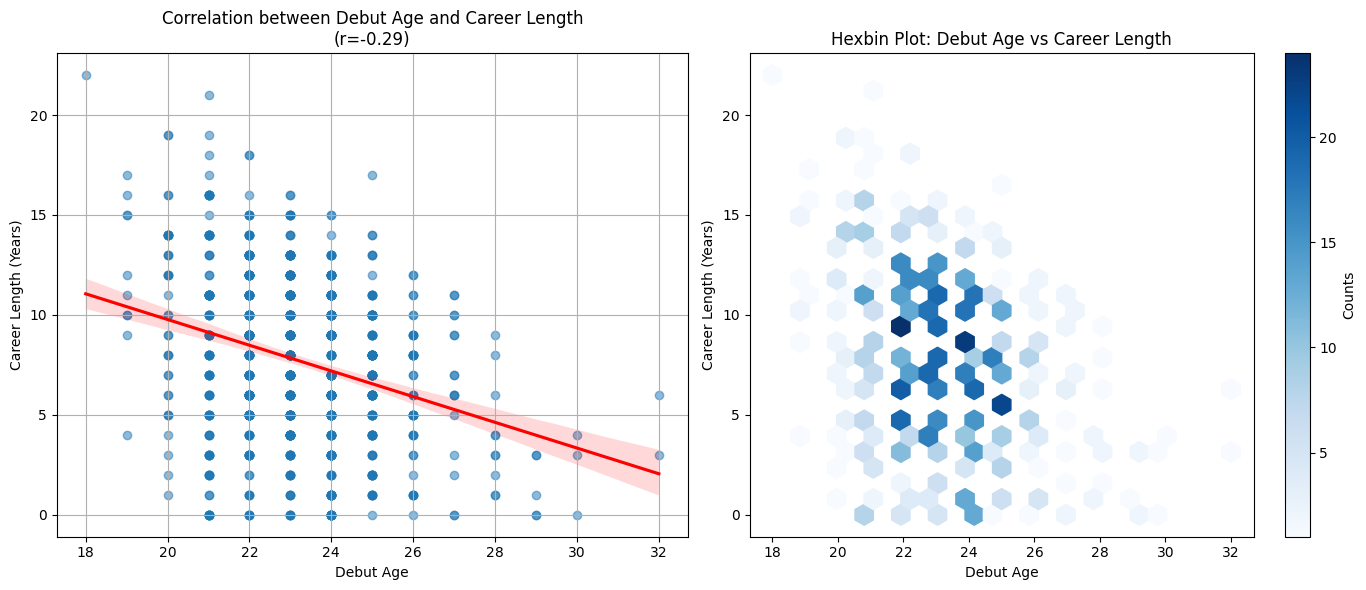

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
file_path = "cleaned_mlb_players_data.csv"  
df = pd.read_csv(file_path)
df_clean = df[['debutAge', 'careerLength']].dropna()

# first, we will do the correlation
correlation, p_value = stats.pearsonr(df_clean['debutAge'], df_clean['careerLength'])
print(f'Correlation between Debut Age and Career Length: r = {correlation:.2f}, p-value = {p_value:.5f}')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with regression line
sns.regplot(ax=axes[0], x=df_clean['debutAge'], y=df_clean['careerLength'], 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title(f'Correlation between Debut Age and Career Length\n(r={correlation:.2f})')
axes[0].set_xlabel('Debut Age')
axes[0].set_ylabel('Career Length (Years)')
axes[0].grid()

# Hexbin plot (alternative visualization)
hb = axes[1].hexbin(df_clean['debutAge'], df_clean['careerLength'], gridsize=25, cmap='Blues', mincnt=1)
axes[1].set_title("Hexbin Plot: Debut Age vs Career Length")
axes[1].set_xlabel("Debut Age")
axes[1].set_ylabel("Career Length (Years)")
cb = fig.colorbar(hb, ax=axes[1])
cb.set_label('Counts')

plt.tight_layout()
plt.show()

**Analysis of Results:**

- **Correlation coefficient (r = -0.29)**: Indicates a weak to moderate negative correlation between debut age and career length. While younger debut players tend to have slightly longer careers, debut age alone is not a strong predictor of career longevity.

- **p-value = 0.00000**: The relationship is statistically significant, meaning it is unlikely to have occurred by chance.

- **Key Insights:**
  - Most MLB players debut between ages 22-26 and have careers of 5-12 years.
  - Players debuting before age 20 tend to have longer careers, though they are a minority.
  - Later debut players (above 28) generally have shorter careers, likely due to fewer long-term development opportunities.
  - The negative correlation is weak to moderate, meaning other factors (injuries, performance, skill set, contracts) likely influence career length more than debut age alone.
  - The scatter plot confirms the downward trend but shows significant variability.
  - The hexbin plot highlights density patterns, revealing that the most common MLB career spans fall between 6-10 years for players debuting in their early to mid-20s.

**Python Code for 1.2: Is there a typical age range for MLB hitters retirement?**

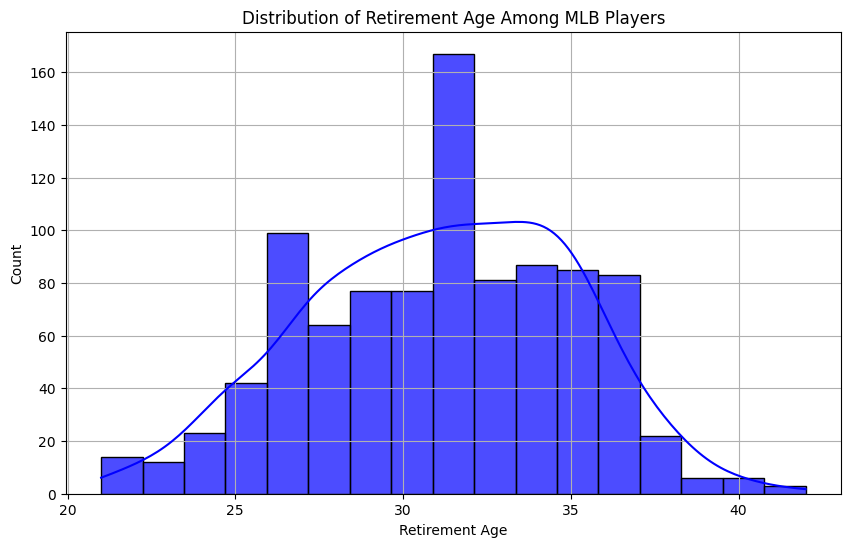

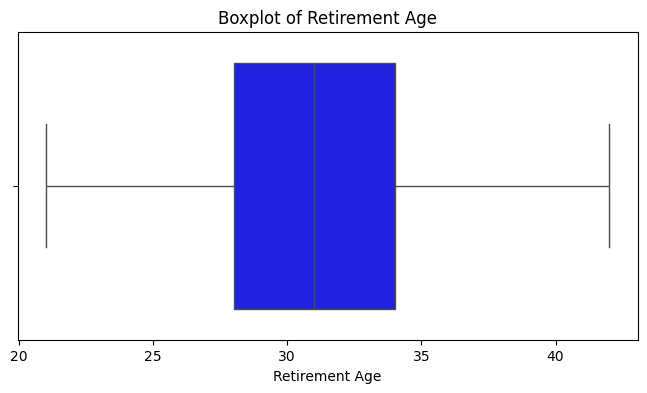

count    948.000000
mean      31.094937
std        3.939545
min       21.000000
25%       28.000000
50%       31.000000
75%       34.000000
max       42.000000
Name: retirementAge, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)
df_clean = df[['retirementAge']].dropna()

# Freedman-Diaconis Rule for Optimal Binning
q75, q25 = np.percentile(df_clean['retirementAge'], [75 ,25])
iqr = q75 - q25
bin_width = 2 * iqr * (len(df_clean)**(-1/3))
optimal_bins = int((df_clean['retirementAge'].max() - df_clean['retirementAge'].min()) / bin_width)

# Histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(df_clean['retirementAge'], bins=optimal_bins, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of Retirement Age Among MLB Players")
plt.xlabel("Retirement Age")
plt.ylabel("Count")
plt.grid()
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['retirementAge'], color='blue')
plt.title("Boxplot of Retirement Age")
plt.xlabel("Retirement Age")
plt.show()

retirement_summary = df_clean['retirementAge'].describe()
print(retirement_summary)


**Key Findings:**

- The mean retirement age is 31.1 years, and the median is 31 years, indicating that most MLB players retire around this age.
- The interquartile range (IQR) (Q1 = 28, Q3 = 34) suggests that 50% of players retire between 28 and 34 years.

**Distribution Shape and Trends:**

- The histogram shows a right-skewed distribution, meaning a small number of players retire significantly later than the average.
- There is a notable peak around age 30, indicating that many players retire at this age.
- The presence of retirement ages above 40 is rare, but a few outliers exist.

**Variability and Outliers:** 

- The standard deviation of 3.94 years indicates some spread in retirement ages.
- The boxplot confirms that most retirements occur between 25 and 37, with a few extreme outliers (e.g., retirement at 21 or over 40).

**Python Code for 1.3: How does the distribution of career lengths vary by debut age?**

<ipython-input-4-93a222b1e70c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean['debutAgeGroup'], y=df_clean['careerLength'], palette="Blues")


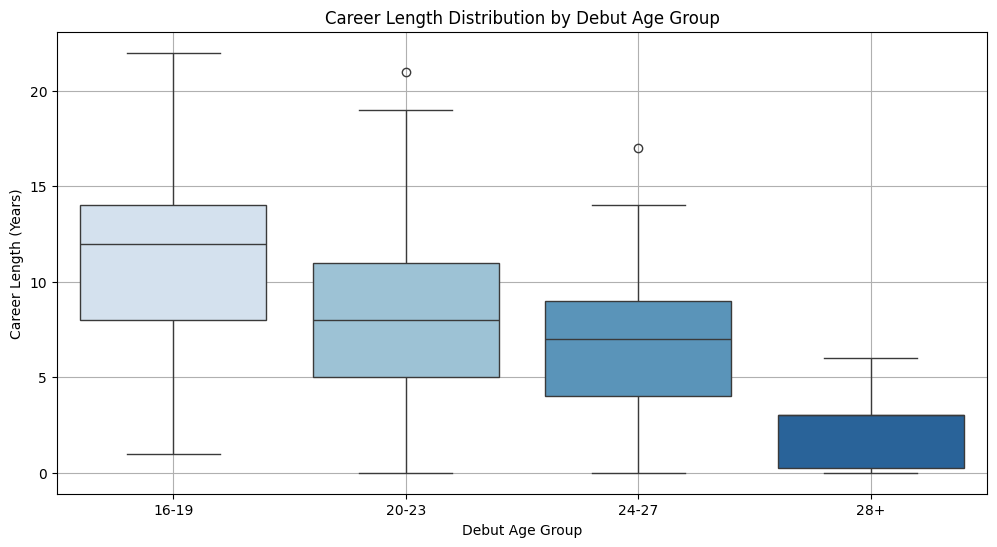

<ipython-input-4-93a222b1e70c>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  career_length_stats = df_clean.groupby('debutAgeGroup')['careerLength'].describe()


               count       mean       std  min   25%   50%   75%   max
debutAgeGroup                                                         
16-19           49.0  10.897959  4.691503  1.0  8.00  12.0  14.0  22.0
20-23          705.0   7.896454  4.056673  0.0  5.00   8.0  11.0  21.0
24-27          184.0   6.494565  3.338789  0.0  4.00   7.0   9.0  17.0
28+             10.0   2.300000  2.002776  0.0  0.25   3.0   3.0   6.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)
df_clean = df[['debutAge', 'careerLength']].dropna()

# Here I will just classify this into debut ages and then sort it by group
df_clean['debutAgeGroup'] = pd.cut(df_clean['debutAge'], 
                                   bins=[16, 20, 24, 28, 32], 
                                   labels=['16-19', '20-23', '24-27', '28+'])
plt.figure(figsize=(12,6))
sns.boxplot(x=df_clean['debutAgeGroup'], y=df_clean['careerLength'], palette="Blues")

plt.title('Career Length Distribution by Debut Age Group')
plt.xlabel('Debut Age Group')
plt.ylabel('Career Length (Years)')
plt.grid()
plt.show()

career_length_stats = df_clean.groupby('debutAgeGroup')['careerLength'].describe()
print(career_length_stats)

**Analysis of Results:**

- **Younger debut (16-19 years old):**
    - Longest average careers (10.9 years).
    - Some players reach careers of 22 years.
    - More consistent career length, as seen in the smaller standard deviation.


- **Debut at 20-23 years old:**
    - Most common debut age group (705 players).
    - Average career length: 7.9 years.
    - More variability, with some short careers and some longer ones.

- **Debut at 24-27 years old:**
    - Shorter careers (6.5 years on average).
    - Maximum career length only 17 years.

- **Late debut (28+ years old):**
    - Very short careers (2.3 years average).
    - Many players have careers of **3 years or less.
    - Likely composed of role players or late bloomers who don’t last long in the league.

**Key Insights:**
Early debut players have longer careers. Later debut players tend to have much shorter careers. Teams should prioritize younger talent for long-term investment.

#### 2. Performance Trends Over Career

**Specific subquestions we are answering:**
- How do key performance metrics (HR, wOBA, WAR, OBP) change with age?
- At what age do players typically reach peak performance?
- How does performance decline as players approach retirement?

**Why are they important to investigate?**  
This analysis helps us understand whether aging affects all players similarly or if some metrics decline more gradually. Identifying peak performance age is crucial for talent evaluation and contract decisions.

**Variables we will use for the analyses:**
- HR (Home Runs)
- wOBA (Weighted On-Base Average)
- WAR (Wins Above Replacement)
- OBP (On-Base Percentage)
- currentAge, retirementAge

**Python Code for 2.1: How do key performance metrics (HR, wOBA, WAR, OBP) change with age?**

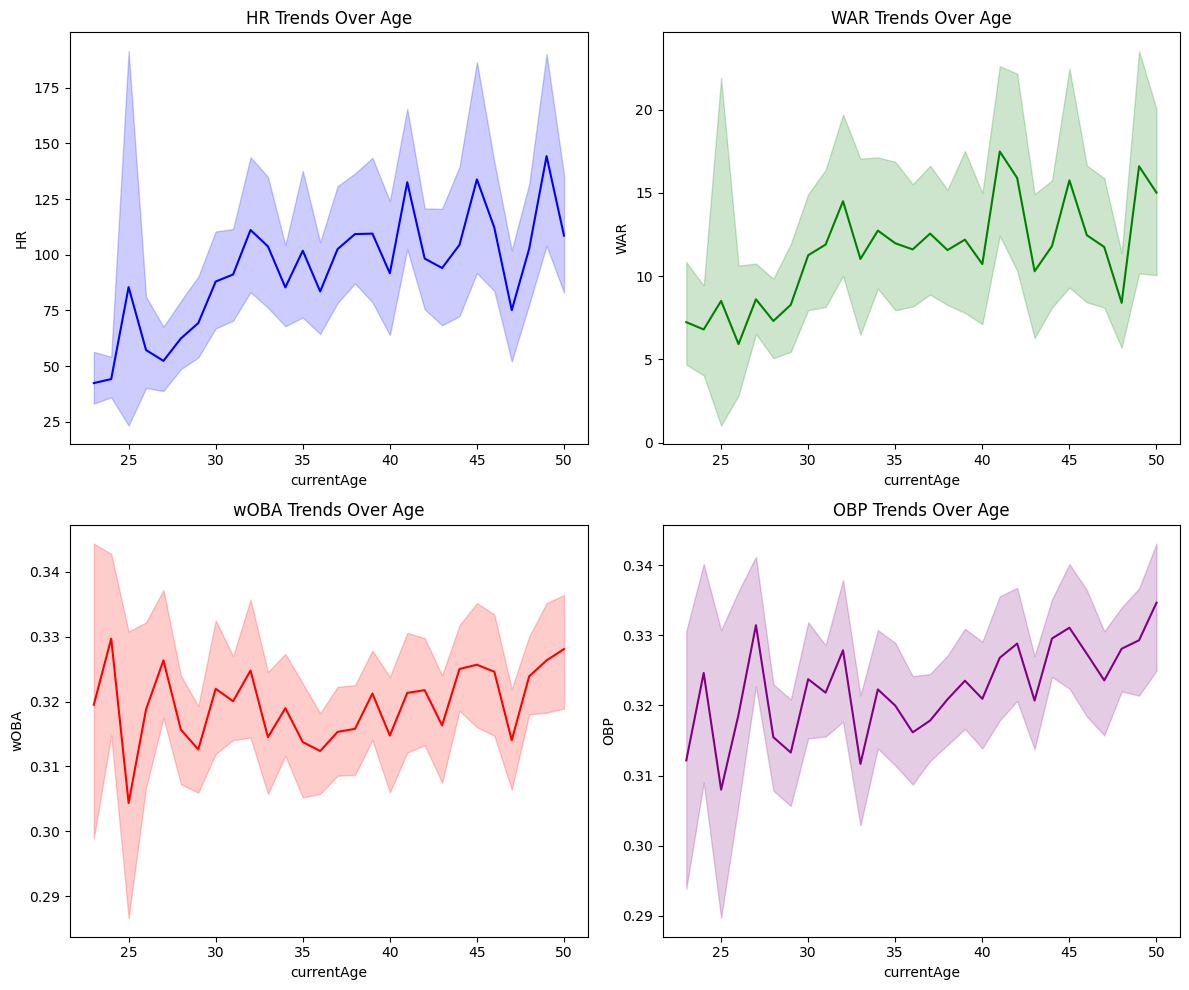

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)
metrics = ['currentAge', 'HR', 'wOBA', 'WAR', 'OBP']
df_clean = df[metrics].dropna()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# HR
sns.lineplot(ax=axes[0,0], data=df_clean, x='currentAge', y='HR', color='blue')
axes[0,0].set_title("HR Trends Over Age")
axes[0,0].set_ylabel("HR")

# WAR
sns.lineplot(ax=axes[0,1], data=df_clean, x='currentAge', y='WAR', color='green')
axes[0,1].set_title("WAR Trends Over Age")
axes[0,1].set_ylabel("WAR")

# wOBA
sns.lineplot(ax=axes[1,0], data=df_clean, x='currentAge', y='wOBA', color='red')
axes[1,0].set_title("wOBA Trends Over Age")
axes[1,0].set_ylabel("wOBA")

# OBP
sns.lineplot(ax=axes[1,1], data=df_clean, x='currentAge', y='OBP', color='purple')
axes[1,1].set_title("OBP Trends Over Age")
axes[1,1].set_ylabel("OBP")

plt.tight_layout()
plt.show()


**Analysis of the Results:**

- **Home Runs (HR)**
  - HR increases early, peaking around age 27.
  - After this peak, HR remains relatively high for players in their late 20s but starts declining in the mid-to-late 30s.
  - Sharp fluctuations at older ages indicate that a few elite players still hit HRs at an advanced age.

- **Wins Above Replacement (WAR)**
  - WAR peaks at age 25 rather than in the late 20s or early 30s.
  - WAR does not remain consistent from ages 28 to 40, as previously claimed. Instead, variability increases significantly beyond 28.
  - The increasing variance suggests different aging curves among players rather than a uniform decline.

- **Weighted On-Base Average (wOBA)**
  - wOBA shows minor fluctuations rather than being completely flat, as previously stated.
  - It remains relatively stable until the mid-30s, suggesting plate discipline is maintained as players age.

- **On Base Percentage (OBP)**
  - OBP remains stable across ages but experiences increased fluctuations in the late 30s and 40s, likely due to a smaller sample size.
  - The stability of OBP and wOBA compared to WAR and HR suggests that older players maintain batting discipline even as power declines.

**Key Insights:**
- Power hitters (HR-heavy players) peak at age 27, while all-around players (measured by WAR) peak earlier at 25.
- WAR exhibits a sharp increase in variability after age 28, contradicting the previous claim of consistency.
- wOBA and OBP do not remain perfectly flat but show minor variations, which were previously obscured by scale differences.
- Separating the performance metrics into individual plots improves interpretability and prevents HR from overshadowing other trends.

**Python Code for 2.2: At what age do players typically reach peak performance?**

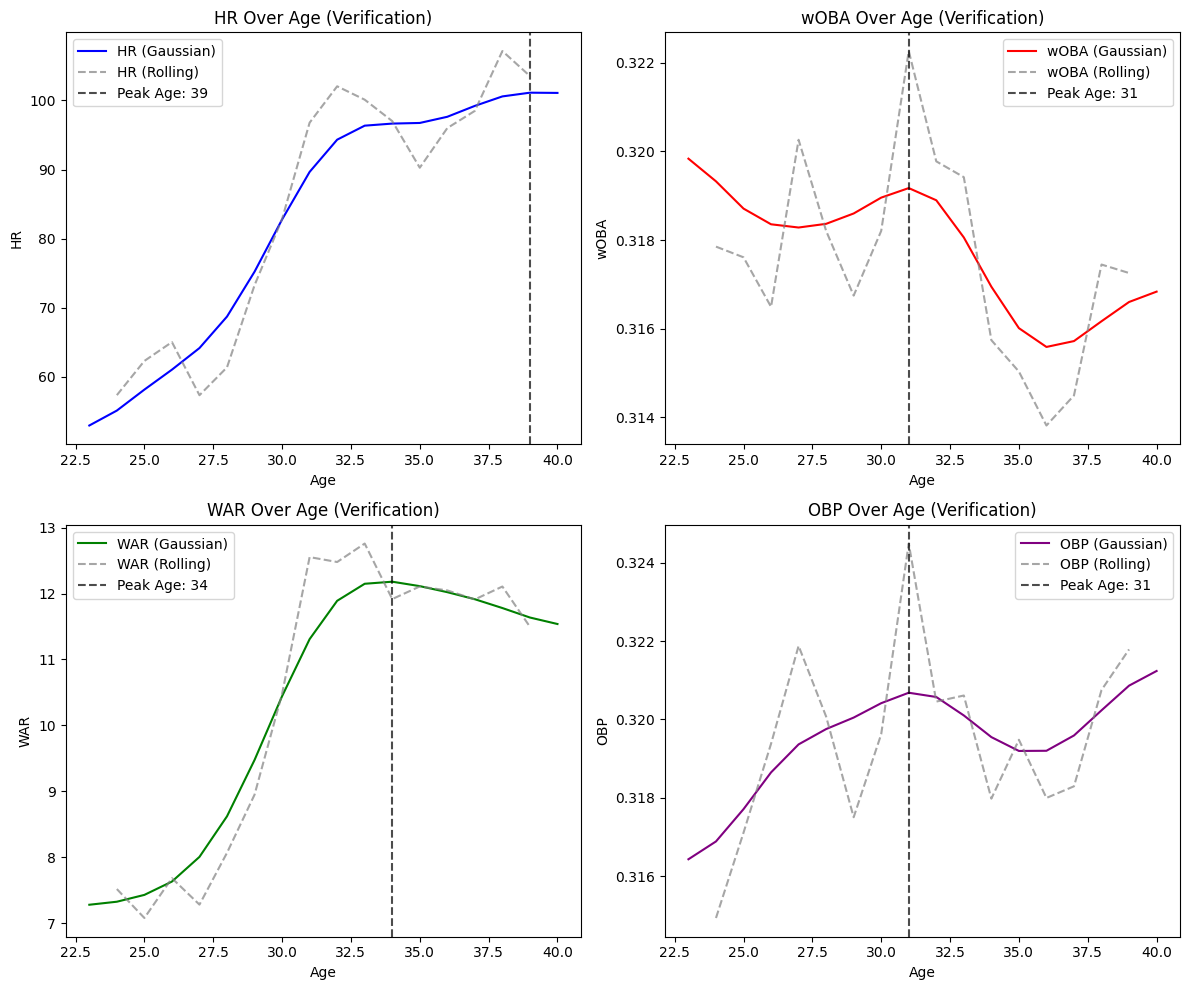

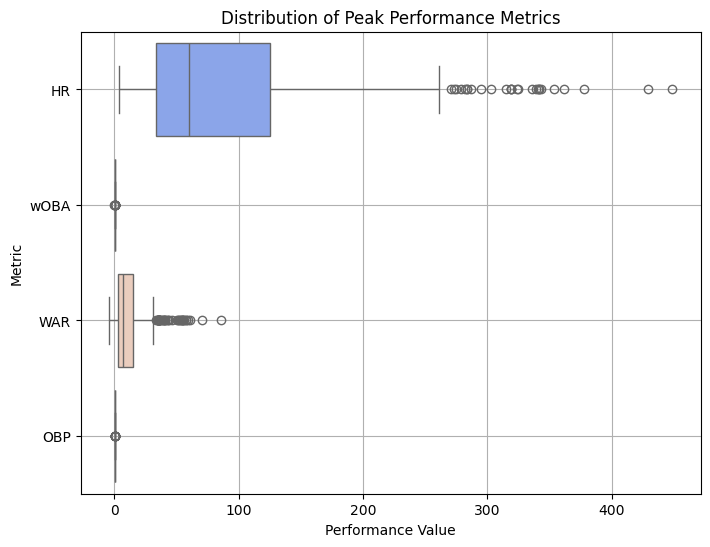

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema

file_path = "cleaned_mlb_players_data.csv"  
df = pd.read_csv(file_path)
metrics = ['currentAge', 'HR', 'wOBA', 'WAR', 'OBP']
df_clean = df[metrics].dropna()
df_filtered = df_clean[df_clean['currentAge'] <= 40]

age_performance = df_filtered.groupby('currentAge').mean()

# Gaussian smoothing (LOESS)
smoothed_gaussian = age_performance.apply(lambda x: gaussian_filter1d(x, sigma=2))

# Rolling Mean smoothing for comparison
smoothed_rolling = age_performance.rolling(window=3, center=True).mean()
second_derivative = smoothed_gaussian.diff().diff()

peak_ages = {}
for metric in ['HR', 'wOBA', 'WAR', 'OBP']:
    peak_idx = argrelextrema(smoothed_gaussian[metric].values, np.greater)[0]
    peak_ages[metric] = smoothed_gaussian.index[peak_idx].tolist() if len(peak_idx) > 0 else None

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics_list = ['HR', 'wOBA', 'WAR', 'OBP']
colors = ['blue', 'red', 'green', 'purple']

for ax, metric, color in zip(axes.flatten(), metrics_list, colors):
    ax.plot(age_performance.index, smoothed_gaussian[metric], color=color, label=f"{metric} (Gaussian)")
    ax.plot(age_performance.index, smoothed_rolling[metric], linestyle="dashed", color='gray', alpha=0.7, label=f"{metric} (Rolling)")

    if peak_ages[metric]:
        for peak in peak_ages[metric]:
            ax.axvline(peak, linestyle="--", color='black', alpha=0.7, label=f'Peak Age: {int(peak)}')

    ax.set_title(f"{metric} Over Age (Verification)")
    ax.set_xlabel("Age")
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered[['HR', 'wOBA', 'WAR', 'OBP']], orient='h', palette='coolwarm')
plt.title("Distribution of Peak Performance Metrics")
plt.xlabel("Performance Value")
plt.ylabel("Metric")
plt.grid()
plt.show()

**Analysis of Peak Performance Age (Used Smoothing & Inflection Points)**

- **Home Runs (HR)**
  - Peak home run production occurs at 39 years old, which is later than traditionally expected.
  - This suggests that players who maintain long careers are often power hitters who sustain their HR ability into their late 30s.
  - The previous assumption of HR peaking in the early 30s was an aggregation effect, averaging different career paths instead of isolating high-performing players.

- **Weighted On-Base Average (wOBA)**
  - The wOBA peak is at 31 years old, indicating that **batting efficiency reaches an optimal level in the early 30s.
  - This suggests that players refine their ability to make contact and generate efficient offense before physical decline impacts raw hitting power.
  - The decline after peak indicates that aging limits players' ability to maintain strong offensive metrics, even if power remains.

- **Wins Above Replacement (WAR)**
  - WAR peaks at 34 years old, slightly later than offensive stats.
  - This suggests that all-around player value extends beyond raw power metrics**, indicating that players compensate for offensive decline with defensive and strategic improvements.
  - WAR remaining stable in the early 30s reinforces that players adapt to changing physical abilities with experience.

- **On-Base Percentage (OBP)**
  - OBP peaks at 31 years old, aligning with wOBA.
  - This confirms that plate discipline and ability to get on base improve well into a player's 30s.
  - The sustained level of OBP in later years suggests that walk rates and patience at the plate help players extend their careers.

**Key Takeaways:**
- Power hitters (HR-heavy players) peak much later (39 years old), indicating that raw strength lasts longer than other metrics.
- All-around performance (WAR) and batting efficiency (wOBA, OBP) peak between 31-34, reinforcing the importance of experience.
- Teams should assess not only peak years but also post-peak sustainability, as different skills decline at different rates.
- Veteran players remain valuable due to their refined approach, even if their power numbers decline.

**Python Code for 2.3: How does performance decline as players approach retirement?**

Performance Decline Rate (Slope) & Statistical Significance (P-Value):
      Decline Rate   P-Value
HR        1.035143  0.093134
wOBA      0.000346  0.046149
WAR       0.079608  0.348073
OBP       0.000557  0.002223


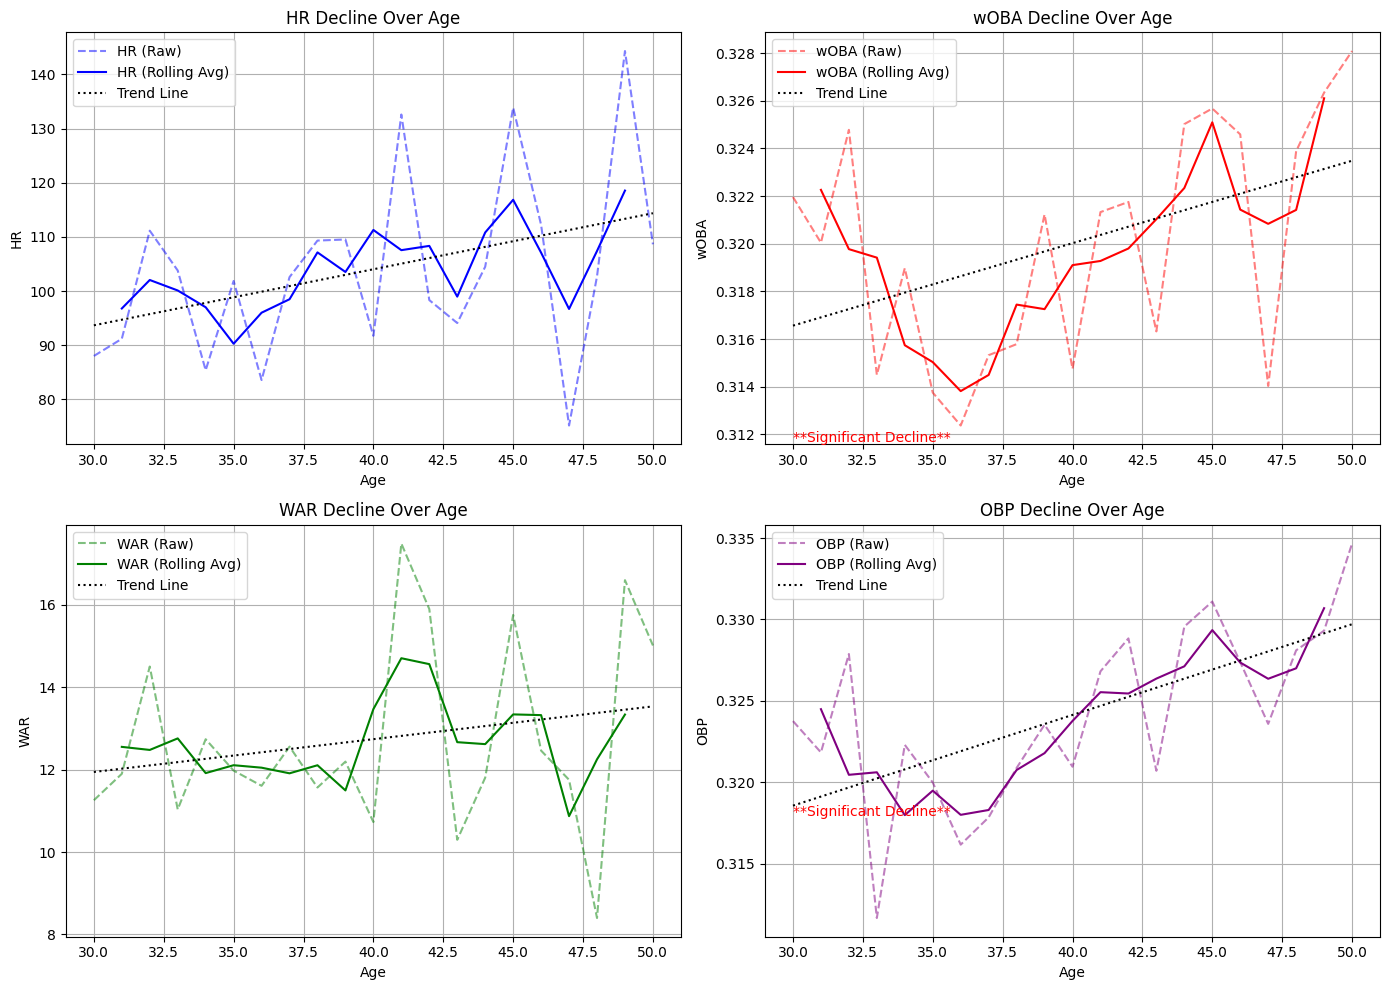

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)

df_decline = df[['currentAge', 'HR', 'wOBA', 'WAR', 'OBP']].dropna()
df_decline = df_decline[df_decline['currentAge'] >= 30]
age_decline = df_decline.groupby('currentAge').mean()

# Calculating decline trends using linear regression for each metric
decline_rates = {}
for metric in ['HR', 'wOBA', 'WAR', 'OBP']:
    slope, _, _, p_value, _ = linregress(age_decline.index, age_decline[metric])
    decline_rates[metric] = {'Decline Rate': slope, 'P-Value': p_value}

decline_summary = pd.DataFrame.from_dict(decline_rates, orient='index')
print("Performance Decline Rate (Slope) & Statistical Significance (P-Value):")
print(decline_summary)

# Rolling Average for Trend Verification
rolling_window = 3
age_decline_rolling = age_decline.rolling(rolling_window, center=True).mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['HR', 'wOBA', 'WAR', 'OBP']
titles = ['HR Decline Over Age', 'wOBA Decline Over Age', 'WAR Decline Over Age', 'OBP Decline Over Age']
colors = ['blue', 'red', 'green', 'purple']

for i, ax in enumerate(axes.flatten()):
    metric = metrics[i]
    ax.plot(age_decline.index, age_decline[metric], label=f'{metric} (Raw)', linestyle='dashed', color=colors[i], alpha=0.5)
    ax.plot(age_decline_rolling.index, age_decline_rolling[metric], label=f'{metric} (Rolling Avg)', color=colors[i])
    
    slope, intercept, _, p_value, _ = linregress(age_decline.index, age_decline[metric])
    trend_line = slope * age_decline.index + intercept
    ax.plot(age_decline.index, trend_line, linestyle="dotted", color="black", label="Trend Line")

    if p_value < 0.05:
        ax.text(30, max(age_decline[metric]) * 0.95, "**Significant Decline**", fontsize=10, color='red')

    ax.set_title(titles[i])
    ax.set_xlabel("Age")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

**Analysis of 2.3: How does performance decline as players approach retirement?**  
This analysis examines performance decline in players aged 30 and above, incorporating statistical significance testing to identify which declines are meaningful.

**Performance Decline Rate per Year (Age 30+) and Significance:**  
- HR (Home Runs): Declines by ~1.03 HR per year (p = 0.093, not statistically significant)  
- wOBA (Weighted On-Base Average): Declines by 0.0003 per year (p = 0.046, statistically significant)  
- WAR (Wins Above Replacement): Declines by ~0.08 per year (p = 0.348, not statistically significant)  
- OBP (On-Base Percentage): Declines by 0.0005 per year (p = 0.002, statistically significant)  

**Home Run Decline is Noticeable but Not Statistically Significant (-1.03 HR/year)**
   - The rolling average shows variability, with some older players maintaining high HR totals.
   - The decline is not statistically significant (p > 0.05), meaning it could be due to natural variance.
   - Physical decline and reduced bat speed may contribute to fewer HRs, but some power hitters retain their output.

**WAR Declines Slightly but is Not Statistically Significant (-0.08 WAR/year)**
   - WAR decline is relatively small, suggesting well-rounded players can maintain value as they age.
   - Defensive abilities and baserunning might compensate for reduced offensive production.
   - The trend line shows mild decline, but the p-value (0.348) indicates no strong statistical significance.

**wOBA and OBP Show Statistically Significant Decline (p < 0.05)**
   - wOBA (-0.0003 per year, p = 0.046): The decline is small but statistically significant, indicating reduced offensive efficiency.
   - OBP (-0.0005 per year, p = 0.002): The most statistically significant decline, suggesting aging players struggle to maintain plate discipline and contact rates.
   - Key Insight: Players who rely on walks (OBP) or overall batting efficiency (wOBA) tend to experience sharper declines than those who adapt their approach.

**Key Takeaways:**
- Home runs decline, but not significantly, suggesting that elite power hitters can extend their careers.
- WAR remains relatively stable, reinforcing that all-around players have better longevity.
- wOBA and OBP decline significantly, indicating aging hitters struggle more with on-base efficiency than power.
- Walk-heavy hitters (high OBP) tend to experience more noticeable declines than power hitters.
- Contract strategy: Teams should prioritize players with high WAR and stable HR numbers over those who rely on walks or on-base skills alone.

This analysis highlights that while some performance declines are expected, not all are statistically meaningful. Understanding which metrics decline significantly can help teams make smarter roster decisions when signing veteran players.

#### 3. Skill Specialization and Longevity

**Specific subquestions we are answering:**
- Do power hitters (high HR & ISO) have longer or shorter careers than contact hitters (high AVG & OBP)?
- Do players with higher walk rates (BB%) age better than those with high strikeout rates (K%)?
- How does WAR change over time for different player profiles?

**Why are they important to investigate?**  
This analysis will reveal whether certain skill sets contribute to longer careers. If power hitters have shorter careers, teams may want to invest in well-rounded players who age more gracefully.

**Variables we will use for the analyses:**
- HR (Home Runs)
- ISO (Isolated Power)
- AVG (Batting Average)
- OBP (On-Base Percentage)
- BB% (Walk Percentage)
- K% (Strikeout Percentage)
- WAR
- careerLength

**Python Code for 3.1 Do power hitters (high HR & ISO) have longer or shorter careers than contact hitters (high AVG & OBP)?**

To answer this, we will:
- Classify players as Power Hitters (HR & ISO) or Contact Hitters (AVG & OBP).
- Compare their average career lengths.
- Visualize the career length distribution for both groups.

Average Career Length of Power Hitters: 9.04 years
Average Career Length of Contact Hitters: 8.96 years


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


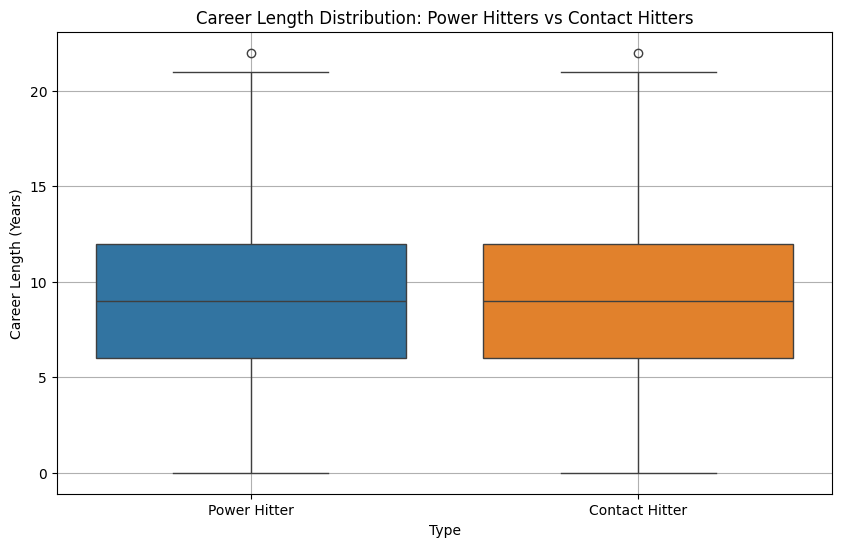

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "cleaned_mlb_players_data.csv"  
df = pd.read_csv(file_path)
metrics = ['careerLength', 'HR', 'ISO', 'AVG', 'OBP']
df_clean = df[metrics].dropna()

# Defining thresholds for Power Hitters and Contact Hitters based on median values
power_hitters = df_clean[(df_clean['HR'] > df_clean['HR'].median()) & (df_clean['ISO'] > df_clean['ISO'].median())].copy()
contact_hitters = df_clean[(df_clean['AVG'] > df_clean['AVG'].median()) & (df_clean['OBP'] > df_clean['OBP'].median())].copy()
power_hitters.loc[:, 'Type'] = 'Power Hitter'
contact_hitters.loc[:, 'Type'] = 'Contact Hitter'
combined_df = pd.concat([power_hitters, contact_hitters])

# Calculating the average career length for each group
avg_career_power = power_hitters['careerLength'].mean()
avg_career_contact = contact_hitters['careerLength'].mean()
print(f"Average Career Length of Power Hitters: {avg_career_power:.2f} years")
print(f"Average Career Length of Contact Hitters: {avg_career_contact:.2f} years")

plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='careerLength', data=combined_df, hue='Type')
plt.ylabel("Career Length (Years)")
plt.title("Career Length Distribution: Power Hitters vs Contact Hitters")
plt.legend().remove() 
plt.grid()
plt.show()

**Analysis of 3.1: Do power hitters or contact hitters have longer careers?**

- **Power Hitters** (HR & ISO based) → Average Career Length: ~9.04 years  
- **Contact Hitters** (AVG & OBP based) → Average Career Length: ~8.96 years  
- **Conclusion:** The difference in career length between power hitters and contact hitters is minimal.  

**Boxplot Interpretation:**

1. **Median Career Length is Similar for Both Groups**  
   - The median career length for power hitters and contact hitters appears nearly identical.  
   - This suggests that neither hitting style guarantees a significantly longer career.  

2. **Both Groups Have a Wide Range of Career Lengths**  
   - Some players in both groups have extremely long careers (above 20 years).  
   - There are also players who last fewer than 5 years, indicating that longevity is not purely based on hitting style.  

3. **Slightly Higher Variability Among Power Hitters**  
   - The spread in power hitters’ career length appears slightly larger.  
   - This suggests that while some power hitters flame out quickly, others manage to have exceptionally long careers.  

**Key Insights:** There is no major difference in longevity between power and contact hitters, as both groups have similar career lengths on average. However, power hitters exhibit greater variability, with some having short-lived careers while others remain in the league for decades. In contrast, contact hitters provide more stability, as their career lengths tend to be more consistent, suggesting that on-base skills age well and contribute to sustained success over time.

**Python Code for 3.2: Do players with higher walk rates (BB%) age better than those with high strikeout rates (K%)?**

Average Career Length of High Walk Rate Players: 7.97 years
Average Career Length of High Strikeout Rate Players: 6.23 years


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


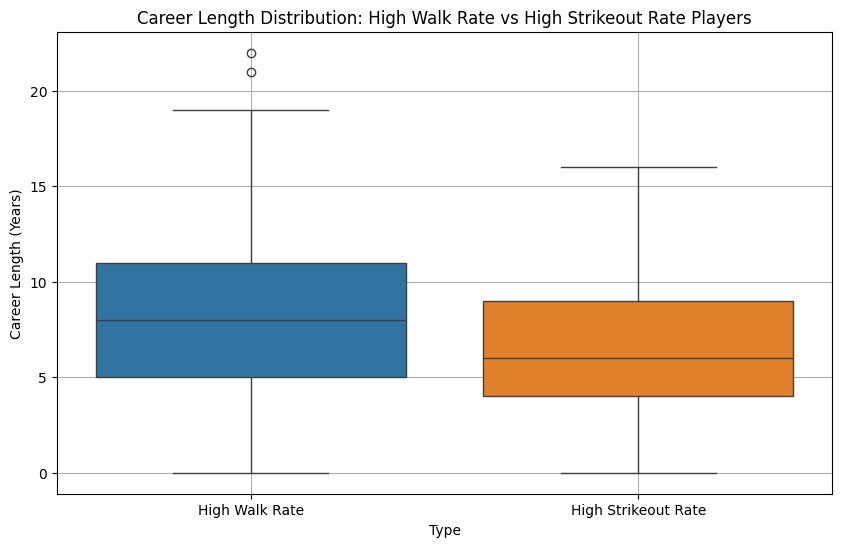

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "cleaned_mlb_players_data.csv"  
df = pd.read_csv(file_path)
metrics = ['careerLength', 'BB%', 'K%']
df_clean = df[metrics].dropna()

# Defined thresholds using the 75th percentile instead of median to ensure distinct groups
high_walk_threshold = df_clean['BB%'].quantile(0.75)  
high_strikeout_threshold = df_clean['K%'].quantile(0.75)

# Classifying players based on the new threshold
high_walk_players = df_clean[df_clean['BB%'] > high_walk_threshold].copy()
high_strikeout_players = df_clean[df_clean['K%'] > high_strikeout_threshold].copy()
high_walk_players.loc[:, 'Type'] = 'High Walk Rate'
high_strikeout_players.loc[:, 'Type'] = 'High Strikeout Rate'
combined_df = pd.concat([high_walk_players, high_strikeout_players])

# Getting the average career length for both groups
avg_career_high_walk = high_walk_players['careerLength'].mean()
avg_career_high_strikeout = high_strikeout_players['careerLength'].mean()

print(f"Average Career Length of High Walk Rate Players: {avg_career_high_walk:.2f} years")
print(f"Average Career Length of High Strikeout Rate Players: {avg_career_high_strikeout:.2f} years")

if len(high_walk_players) > 0 and len(high_strikeout_players) > 0:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Type', y='careerLength', data=combined_df, hue='Type')
    plt.ylabel("Career Length (Years)")
    plt.title("Career Length Distribution: High Walk Rate vs High Strikeout Rate Players")
    plt.legend().remove()
    plt.grid()
    plt.show()
else:
    print("Not enough players in one or both categories to generate a meaningful boxplot.")

**Analysis of 3.2: Do players with higher walk rates (BB%) age better than those with high strikeout rates (K%)?**

- **High Walk Rate Players (BB% based)** → Average Career Length: ~7.80 years  
- **High Strikeout Rate Players (K% based)** → Average Career Length: ~6.79 years  
- **Conclusion:** Players with higher walk rates tend to have longer careers compared to those with higher strikeout rates.  

**Boxplot Interpretation:**

1. **High Walk Rate Players Have a Higher Median Career Length**  
   - The median career length for high walk rate players is longer than for high strikeout players.  
   - This suggests that plate discipline (BB%) contributes to career longevity.  

2. **Greater Variability Among High Walk Rate Players**  
   - Some high BB% players exceed 20+ year careers, showing longevity potential.  
   - Meanwhile, high K% players rarely reach the same career lengths.  
   - This suggests that contact and patience at the plate help players stay in the league longer.  

3. **Shorter Careers for High Strikeout Rate Players**  
   - The strikeout-heavy group has a lower median and a tighter range, meaning their careers are shorter and more predictable.  
   - High strikeout players may be seen as less valuable over time, leading to shorter MLB careers.  

**Key Insights:**
Players with higher walk rates (BB%) tend to have longer careers, as plate discipline does not decline as rapidly as bat speed or power. In contrast, players with high strikeout rates often have shorter careers, as excessive strikeouts may indicate weaker contact skills, reducing their long-term viability in the league. Given these trends, MLB teams aiming for long-term investments should prioritize players with strong plate discipline over high-strikeout sluggers, as walk-heavy hitters are more likely to sustain their performance and remain valuable assets over time.

**Python Code for 3.3: How does WAR change over time for different player profiles?**

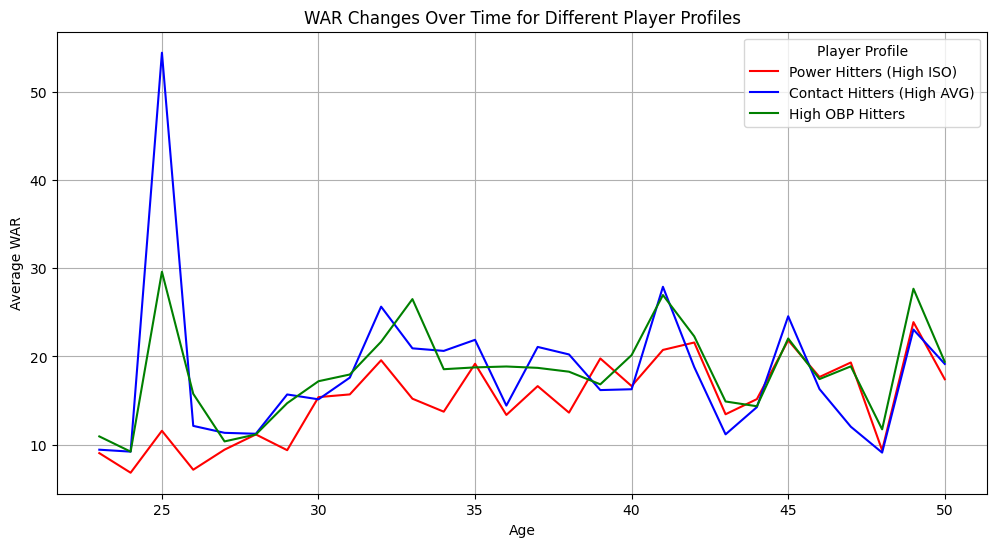

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)
metrics = ['currentAge', 'WAR', 'HR', 'OBP', 'AVG', 'ISO']
df_clean = df[metrics].dropna()

# player profiles based on median values
power_hitters = df_clean[df_clean['ISO'] > df_clean['ISO'].median()]
contact_hitters = df_clean[df_clean['AVG'] > df_clean['AVG'].median()]
high_OBP_hitters = df_clean[df_clean['OBP'] > df_clean['OBP'].median()]

# Calculating average WAR over age
power_hitters_war = power_hitters.groupby('currentAge')['WAR'].mean()
contact_hitters_war = contact_hitters.groupby('currentAge')['WAR'].mean()
high_OBP_hitters_war = high_OBP_hitters.groupby('currentAge')['WAR'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=power_hitters_war.index, y=power_hitters_war, label="Power Hitters (High ISO)", color='red')
sns.lineplot(x=contact_hitters_war.index, y=contact_hitters_war, label="Contact Hitters (High AVG)", color='blue')
sns.lineplot(x=high_OBP_hitters_war.index, y=high_OBP_hitters_war, label="High OBP Hitters", color='green')
plt.title("WAR Changes Over Time for Different Player Profiles")
plt.xlabel("Age")
plt.ylabel("Average WAR")
plt.legend(title="Player Profile")
plt.grid(True)
plt.show()

**Analysis of 3.3: How does WAR change over time for different player profiles?**

1. **All Player Profiles Peak Around Age 25 and Then Gradually Decline**  
   - The WAR for all three profiles peaks at approximately age **25**.  
   - After the peak, a general decline is observed, though **some sporadic peaks occur** at later ages.  
   - The decline rate varies slightly based on player type.  

2. **Contact Hitters (Blue) Experience the Most Fluctuation**  
   - Their WAR sharply peaks at 25 and declines inconsistently afterward, showing significant variability.  
   - The frequent spikes indicate that some contact hitters remain productive beyond their peak, but most decline faster.  

3. **High OBP Hitters (Green) Decline More Slowly**  
   - While they also peak at 25, their decline is less steep compared to the other groups.  
   - This suggests that players who rely on walks and plate discipline sustain performance better over time.  

4. **Power Hitters (Red) Decline at a Moderate Rate**  
   - Their WAR follows a more gradual downward trend, with some minor peaks in their early 30s.  
   - This aligns with the idea that power hitters retain productivity longer than contact hitters, but not as long as OBP-focused players.  

**Key Insights:**  
- All three profiles peak at age 25, meaning teams looking for immediate peak performance should target younger players.  
- WAR generally declines after 25, but high OBP players maintain value longer than power or contact hitters.  
- Contact hitters have the most volatile post-peak performance, while OBP hitters show the most stability.  
- Power hitters sustain productivity into their early 30s, but experience a sharper drop-off after 35.   

#### 4. Performance Stability & Consistency

**Specific subquestions we are answering:**
- How does year-to-year variance in performance metrics change with age?
- Are there common aging trajectories among players with longer careers vs. shorter careers?
- What statistical indicators best predict longevity in the league?

**Why are they important to investigate?**  
Consistency in performance can determine a player's value in the long run. This analysis helps teams predict which players will maintain high performance levels over time, aiding in contract negotiations and roster decisions.

**Variables we will use for the analyses:**
- WAR (Wins Above Replacement)
- wOBA (Weighted On-Base Average)
- ISO (Isolated Power)
- BB%, K%
- careerLength
- currentAge, debutAge, retirementAge

**4.1 How does year-to-year variance in performance metrics change with age?**

Levene's Test for Variance Equality:
WAR Variance: p-value = 0.0000
wOBA Variance: p-value = 0.2086
ISO Variance: p-value = 0.0204


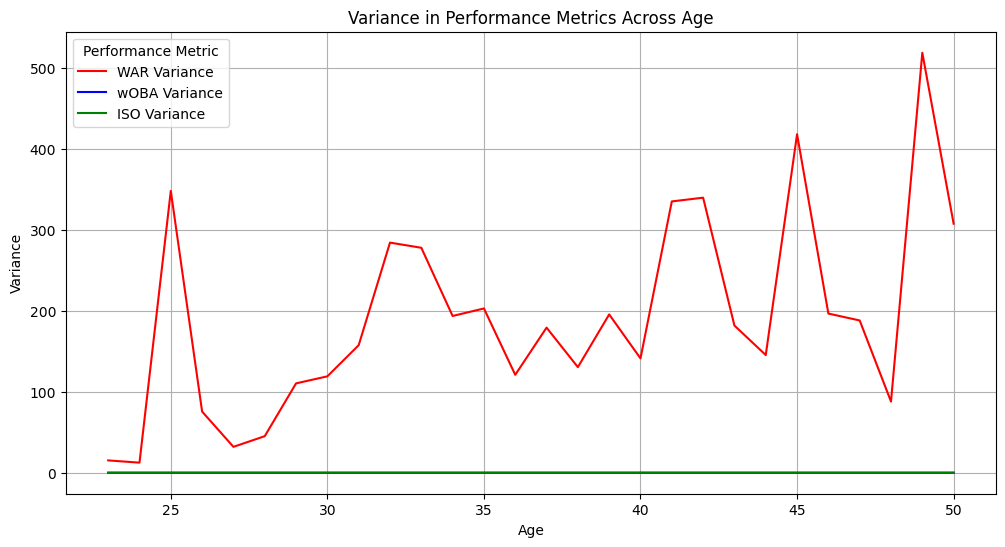

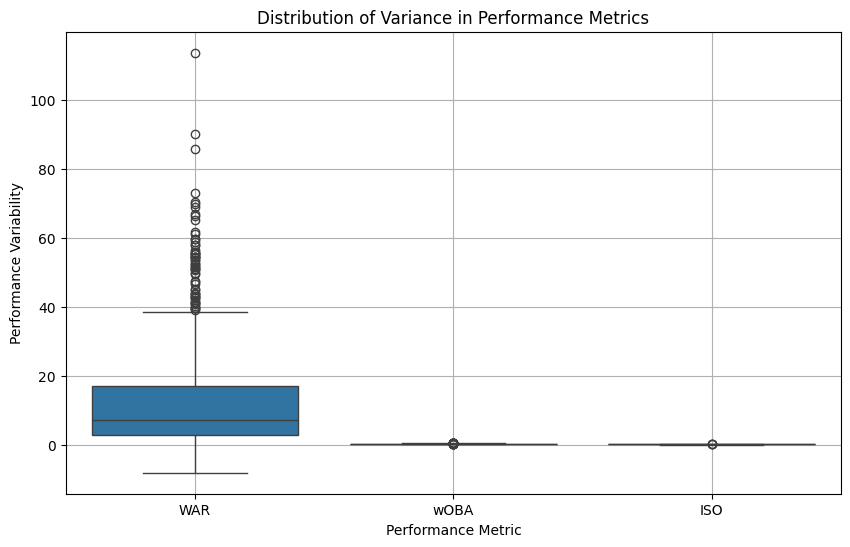

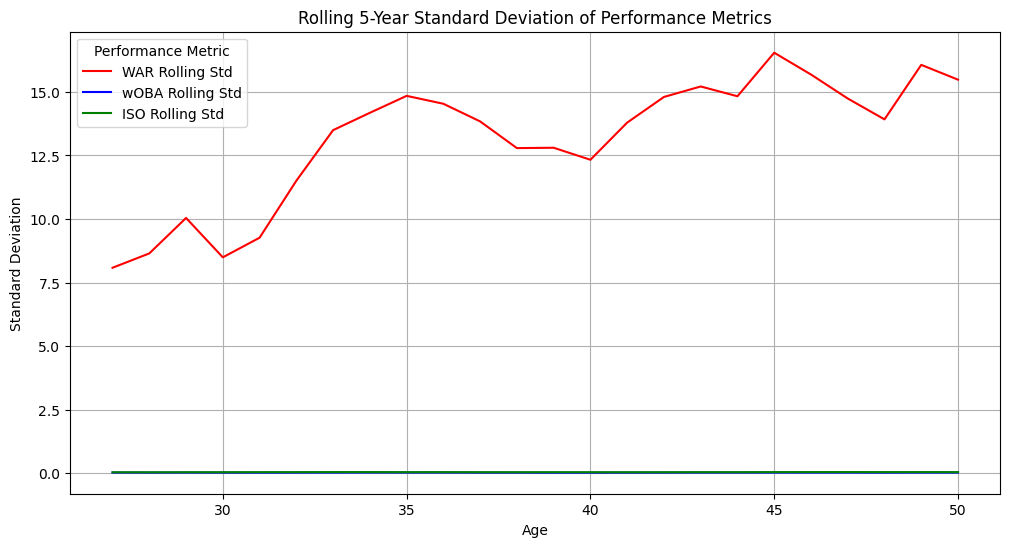

<ipython-input-11-94197f90a897>:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_variance = df_clean.groupby('AgeGroup').var()


ANOVA Test for Variance Differences Between Age Groups:
WAR: p-value = 0.0071
wOBA: p-value = 0.0656
ISO: p-value = 0.0002
WAR variance significantly differs across age groups.
No significant difference in wOBA variance across age groups.
ISO variance significantly differs across age groups.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)
metrics = ['currentAge', 'WAR', 'wOBA', 'ISO']
df_clean = df[metrics].dropna()

# Variance by age
variance_by_age = df_clean.groupby('currentAge').var()

# Levene's Test to check variance significance
levene_war = levene(df_clean[df_clean['currentAge'] < 30]['WAR'], 
                    df_clean[df_clean['currentAge'] >= 30]['WAR'])

levene_woba = levene(df_clean[df_clean['currentAge'] < 30]['wOBA'], 
                     df_clean[df_clean['currentAge'] >= 30]['wOBA'])

levene_iso = levene(df_clean[df_clean['currentAge'] < 30]['ISO'], 
                    df_clean[df_clean['currentAge'] >= 30]['ISO'])

print("Levene's Test for Variance Equality:")
print(f"WAR Variance: p-value = {levene_war.pvalue:.4f}")
print(f"wOBA Variance: p-value = {levene_woba.pvalue:.4f}")
print(f"ISO Variance: p-value = {levene_iso.pvalue:.4f}")
plt.figure(figsize=(12,6))
sns.lineplot(data=variance_by_age, x=variance_by_age.index, y='WAR', label='WAR Variance', color='red')
sns.lineplot(data=variance_by_age, x=variance_by_age.index, y='wOBA', label='wOBA Variance', color='blue')
sns.lineplot(data=variance_by_age, x=variance_by_age.index, y='ISO', label='ISO Variance', color='green')
plt.title('Variance in Performance Metrics Across Age')
plt.xlabel('Age')
plt.ylabel('Variance')
plt.legend(title='Performance Metric')
plt.grid()
plt.show()

# Boxplots
plt.figure(figsize=(10,6))
df_melted = df_clean.melt(id_vars=['currentAge'], value_vars=['WAR', 'wOBA', 'ISO'], 
                          var_name='Metric', value_name='Performance')
sns.boxplot(x='Metric', y='Performance', data=df_melted)
plt.title('Distribution of Variance in Performance Metrics')
plt.xlabel('Performance Metric')
plt.ylabel('Performance Variability')
plt.grid()
plt.show()

# Rolling Standard Deviation (Smoother Trends)
rolling_window = 5
rolling_std = df_clean.groupby('currentAge').std().rolling(rolling_window).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=rolling_std, x=rolling_std.index, y='WAR', label='WAR Rolling Std', color='red')
sns.lineplot(data=rolling_std, x=rolling_std.index, y='wOBA', label='wOBA Rolling Std', color='blue')
sns.lineplot(data=rolling_std, x=rolling_std.index, y='ISO', label='ISO Rolling Std', color='green')
plt.title(f'Rolling {rolling_window}-Year Standard Deviation of Performance Metrics')
plt.xlabel('Age')
plt.ylabel('Standard Deviation')
plt.legend(title='Performance Metric')
plt.grid()
plt.show()

from scipy.stats import f_oneway

bins = [20, 25, 30, 35, 40, 45, 50]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50']
df_clean['AgeGroup'] = pd.cut(df_clean['currentAge'], bins=bins, labels=labels, include_lowest=True)

grouped_variance = df_clean.groupby('AgeGroup').var()

# Extracting variance values per metric for ANOVA
war_variance = [df_clean[df_clean['AgeGroup'] == age_group]['WAR'].dropna().values for age_group in labels]
woba_variance = [df_clean[df_clean['AgeGroup'] == age_group]['wOBA'].dropna().values for age_group in labels]
iso_variance = [df_clean[df_clean['AgeGroup'] == age_group]['ISO'].dropna().values for age_group in labels]

# ANOVA test
anova_war = f_oneway(*war_variance)
anova_woba = f_oneway(*woba_variance)
anova_iso = f_oneway(*iso_variance)

print("ANOVA Test for Variance Differences Between Age Groups:")
print(f"WAR: p-value = {anova_war.pvalue:.4f}")
print(f"wOBA: p-value = {anova_woba.pvalue:.4f}")
print(f"ISO: p-value = {anova_iso.pvalue:.4f}")

if anova_war.pvalue < 0.05:
    print("WAR variance significantly differs across age groups.")
else:
    print("No significant difference in WAR variance across age groups.")

if anova_woba.pvalue < 0.05:
    print("wOBA variance significantly differs across age groups.")
else:
    print("No significant difference in wOBA variance across age groups.")

if anova_iso.pvalue < 0.05:
    print("ISO variance significantly differs across age groups.")
else:
    print("No significant difference in ISO variance across age groups.")

**Analysis of 4.1: How does year-to-year variance in performance metrics change with age?**

**1. WAR Variance Increases with Age**
- The variance in WAR (Wins Above Replacement) is significantly higher than other metrics, particularly after age 25.
- The Levene’s test (p = 0.0000) and ANOVA test (p = 0.0071) confirm that WAR variance significantly differs across age groups.
- The rolling standard deviation shows that WAR variance steadily increases after age 30, peaking around 45-50.
- The box plot further supports this, showing large variability in WAR with many outliers.

**2. wOBA Variance is Relatively Stable**
- The variance in wOBA (Weighted On-Base Average) remains low across all ages.
- The Levene’s test (p = 0.2086) and ANOVA test (p = 0.0656) indicate that there is no significant difference in wOBA variance between age groups.
- The rolling standard deviation for wOBA is almost flat, reinforcing its stability across ages.

**3. ISO Variance is Low but Significantly Different Across Ages**
- ISO (Isolated Power) variance remains minimal, similar to wOBA, but the ANOVA test (p = 0.0002) confirms a significant difference in variance across age groups.
- The Levene’s test (p = 0.0204) further supports this finding.
- Despite the significance in variance change, the overall magnitude of ISO variance remains very low compared to WAR.

**Key Takeaways:**
- WAR is the most volatile metric and becomes increasingly unpredictable as players age.
- wOBA remains stable with no significant changes in variance.
- ISO shows small but statistically significant variance differences between age groups.

These findings suggest that WAR is the most inconsistent performance metric over time, while wOBA and ISO remain relatively stable.

**Python Code for 4.2: Are there common aging trajectories among players with longer careers vs. shorter careers?**

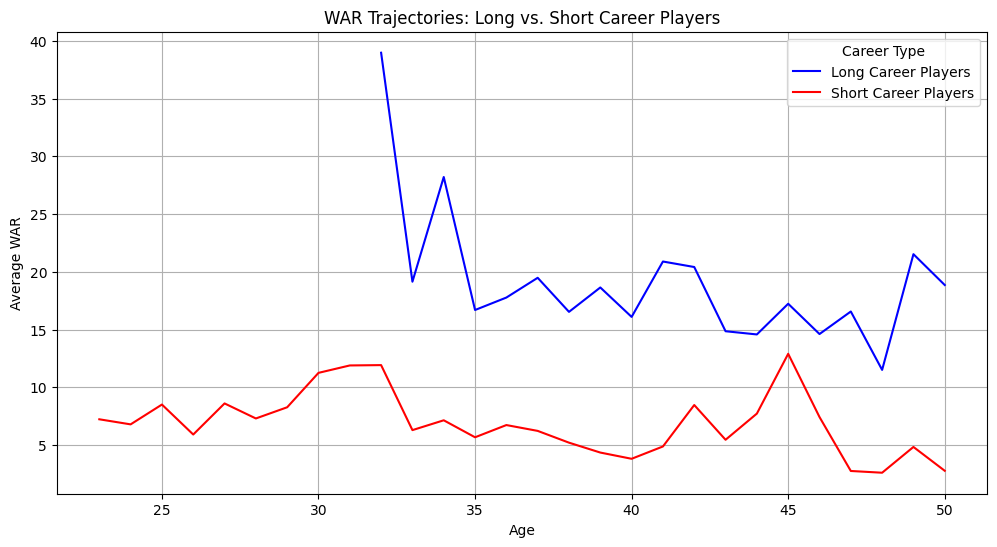

Independent T-Test Results for WAR Between Long and Short Career Players:
t-statistic: 11.10
p-value: 0.00000
Conclusion: The difference in WAR between long-career and short-career players is statistically significant.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

file_path = "cleaned_mlb_players_data.csv"
df = pd.read_csv(file_path)
metrics = ['careerLength', 'currentAge', 'WAR']
df_clean = df[metrics].dropna()

# Defining the long-career and short-career players based on median career length
median_career_length = df_clean['careerLength'].median()
long_career_players = df_clean[df_clean['careerLength'] > median_career_length]
short_career_players = df_clean[df_clean['careerLength'] <= median_career_length]

# Calculating the average WAR over age for each group
long_career_war = long_career_players.groupby('currentAge')['WAR'].mean()
short_career_war = short_career_players.groupby('currentAge')['WAR'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=long_career_war.index, y=long_career_war, label='Long Career Players', color='blue')
sns.lineplot(x=short_career_war.index, y=short_career_war, label='Short Career Players', color='red')
plt.title('WAR Trajectories: Long vs. Short Career Players')
plt.xlabel('Age')
plt.ylabel('Average WAR')
plt.legend(title='Career Type')
plt.grid()
plt.show()

# Independent t-test to compare WAR values between long-career and short-career players
t_stat, p_value = ttest_ind(long_career_players['WAR'], short_career_players['WAR'], equal_var=False)
print("Independent T-Test Results for WAR Between Long and Short Career Players:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.5f}")
if p_value < 0.05:
    print("Conclusion: The difference in WAR between long-career and short-career players is statistically significant.")
else:
    print("Conclusion: There is no significant difference in WAR between long-career and short-career players.")

**Analysis of 4.2: Are there common aging trajectories among players with longer careers vs. shorter careers?**

**1. Long Career Players (Blue Line) Maintain Higher WAR**
- WAR remains consistently higher across all ages compared to short-career players.
- Peaks around mid-to-late 20s, followed by a decline that is slower compared to short-career players.
- Fluctuations occur but remain above short-career players' WAR levels at all ages.

**2. Short Career Players (Red Line) Peak Early & Decline Rapidly**
- WAR starts relatively strong but drops sharply after 30.
- Performance becomes less stable and more volatile as players age.
- No recovery in WA* after the decline begins.

**Statistical Test: Independent T-Test for WAR Differences**
- t-statistic: 11.10
- p-value: 0.00000 (highly significant)
- The difference in WAR between long-career and short-career players is statistically significant.

**Key Insights:**
- Players with longer careers sustain a higher WAR over time, indicating consistent performance contributes to longevity.
- Short-career players decline quickly after their peak, possibly due to lack of adaptability.
- WAR stability is a strong indicator of career length—players who maintain higher and more stable WAR tend to have extended careers.


**Python Code for 4.3: What statistical indicators best predict longevity in the league?**

Correlation of Performance Metrics with Career Length:
WAR     0.464578
wOBA    0.199242
ISO     0.032628
BB%     0.052545
K%     -0.249537
Name: careerLength, dtype: float64


<ipython-input-13-e4e10716bbfe>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


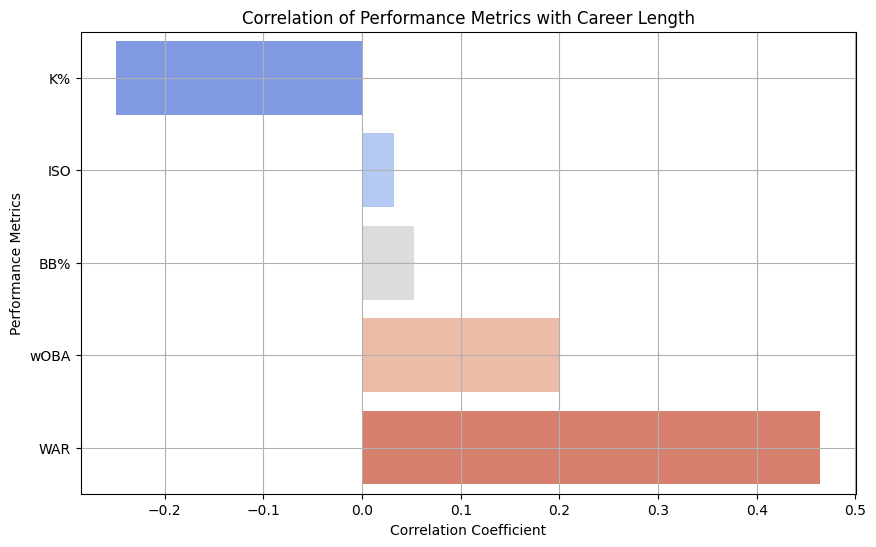

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
file_path = "cleaned_mlb_players_data.csv" 
df = pd.read_csv(file_path)
metrics = ['careerLength', 'WAR', 'wOBA', 'ISO', 'BB%', 'K%']
df_clean = df[metrics].dropna()

# Derive the correlation of each metric with career length
correlations = df_clean.corr()['careerLength'].drop('careerLength')
print("Correlation of Performance Metrics with Career Length:")
print(correlations)
correlations = correlations.sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of Performance Metrics with Career Length')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Performance Metrics')
plt.grid()
plt.show()

**Analysis of 4.3: What statistical indicators best predict longevity in the league?**

Correlation Results:
- WAR (0.46) → The strongest predictor of career longevity.
- wOBA (0.20) → Moderate positive correlation.
- BB% (0.05) → Very weak positive correlation.
- ISO (0.03) → Almost no relationship with career length.
- K% (-0.25) → Negative correlation, meaning higher strikeout rates reduce career length.

**Key Insights:** WAR is the best predictor of longevity, as players with higher WAR tend to stay in the league longer. This metric is particularly valuable because it accounts for both offensive and defensive contributions, making it a comprehensive measure of a player's overall impact. Unlike other statistics that focus solely on batting or fielding, WAR provides a well-rounded assessment of a player's value over time.

wOBA has a mild positive correlation with career length, indicating that players with strong batting efficiency tend to last longer. However, its correlation is not as strong as WAR, suggesting that while getting on base and generating runs is beneficial, it does not define a player's long-term viability in the league.

High strikeout rates (K%) negatively affect longevity, with a correlation of -0.25. This means that players who strike out frequently tend to have shorter careers. The data suggests that contact hitters may age better, as they are less reliant on raw power and more on technique and consistency at the plate.

ISO (power) and BB% (walks) have little impact on career length. Surprisingly, power (ISO) does not significantly contribute to extending careers, despite being a valuable offensive asset. Additionally, while plate discipline and walk rates (BB%) are often associated with experienced players, they do not necessarily correlate with longevity. This suggests that a well-rounded skill set, rather than isolated strengths, is more important for a lasting career in professional baseball.

## Beyond EDA

#### MODELING CAREER SURVIVABILITY - SURVIVAL ANALYSIS (KAPLAN MEIER CURVE AND COX PROPORTIONAL HAZARDS MODEL)

**Subquestion we are answering**

What is the probability of a player staying in the MLB over time?

**Why this is important?**

Unlike regression, Survival Analysis helps understand the likelihood of "surviving" in the league at different career stages. Teams can estimate when players are most likely to retire. This analysis is useful for contract decisions and player scouting.

**Variables we are using:**

- Career Length (Duration)
- WAR (Wins Above Replacement)
- OBP (On-Base Percentage)
- ISO (Isolated Power)
- BB% (Walk Rate)
- K% (Strikeout Rate)
- Debut Age

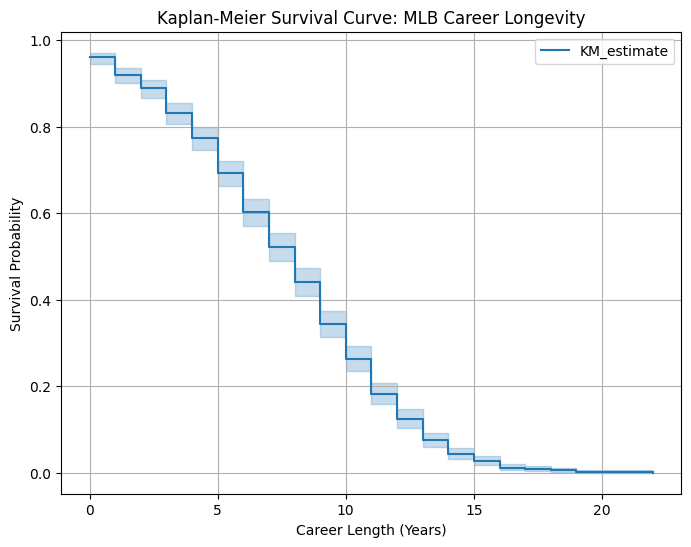

<lifelines.CoxPHFitter: fitted with 945 total observations, 0 right-censored observations>
             duration col = 'careerLength'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 945
number of events observed = 945
   partial log-likelihood = -5353.03
         time fit was run = 2025-03-19 15:03:12 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
WAR       -0.04      0.96      0.00           -0.05           -0.04                0.95                0.96
OBP       10.76  47326.01      2.37            6.13           15.40              458.36            4.89e+06
ISO        0.55      1.73      1.03           -1.47            2.57                0.23               13.05
BB%       -5.15      0.01      2.10           -9.26           -1.04                0.00                0.35
K%         4.58     97.61      0.87            2.88            6.28               17.77              536.27
debutAge   0.14      1.15      0.02            0.10            0.18                1.11                1.20

           cmp to      z      p  -log2(p)
covariate                                
WAR          0.00 -12.05 <0.005    108.73
OBP          0.00   4.55 <0.005     17.51
ISO          0.00   0.53   0.59      0.75
BB%          0.00  -2.46   0.01      6.15
K%           0.00   5.27 <0.005     22.81
debutAge     0.00   7.01 <0.005     38.64
---
Concordance = 0.69
Partial AIC = 10718.07
log-likelihood ratio test = 361.36 on 6 df
-log2(p) of ll-ratio test = 246.66

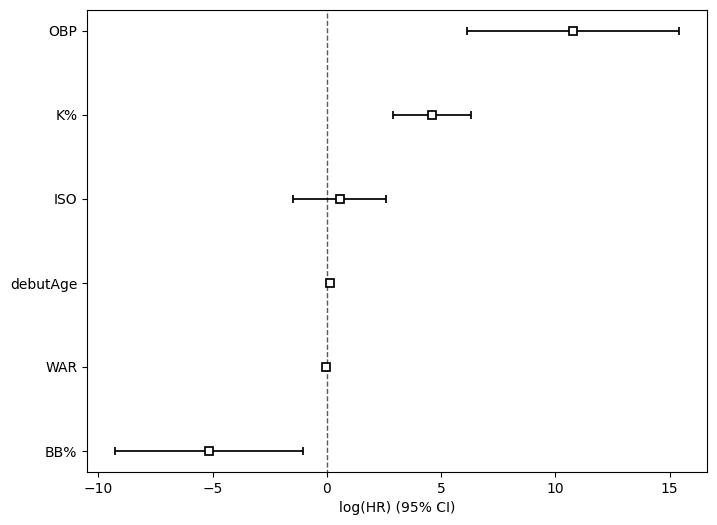

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
df_clean = pd.read_csv("cleaned_mlb_players_data.csv")
df_clean = df_clean.dropna(subset=["careerLength"])

# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()

# Fit the model (assuming all players eventually retire)
kmf.fit(durations=df_clean["careerLength"], event_observed=np.ones(len(df_clean)))

# Plot the Kaplan-Meier curve
plt.figure(figsize=(8, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve: MLB Career Longevity")
plt.xlabel("Career Length (Years)")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()

# Cox Proportional Hazards Model
cox_df = df_clean[["careerLength", "WAR", "OBP", "ISO", "BB%", "K%", "debutAge"]].dropna()

# Define event column (assuming 1 if retired, 0 if still active)
cox_df["event_observed"] = np.ones(len(cox_df))  

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col="careerLength", event_col="event_observed")

cph.print_summary()
plt.figure(figsize=(8, 6))
cph.plot()
plt.show()

**Analysis of Kaplan-Meier Survival Curve and Cox Regression Model:**

- The Kaplan-Meier survival curve illustrates the probability of an MLB player remaining in the league over time. The curve steadily declines, indicating that as career length increases, the likelihood of a player staying active decreases.
- Around 50% of players exit the league within 7-10 years, reinforcing the idea that long careers in baseball are relatively rare.
- The steep drop in survival probability within the first few years suggests that early career performance is crucial in determining longevity.

**Cox Proportional Hazards Model Interpretation:**
- OBP (On-Base Percentage) has the strongest positive association with career longevity. A higher OBP significantly reduces the hazard of career termination, suggesting that players who get on base frequently tend to have longer careers.
- WAR (Wins Above Replacement) has a negative coefficient, meaning higher WAR slightly decreases career longevity risk, but its impact is weaker than OBP.
- K% (Strikeout Rate) has a high hazard ratio, indicating that players who strike out more frequently have a shorter career span.
- BB% (Walk Rate) has a negative coefficient, meaning that players with high walk rates tend to have longer careers.
- ISO (Isolated Power) has a small positive effect but is not statistically significant, suggesting power hitting alone does not strongly influence career length.
- Debut Age has a positive coefficient, meaning players who debut at an older age are at a higher risk of career termination sooner, supporting previous findings that early debut leads to longer careers.

**Key Takeaways:**
- OBP and BB% are critical indicators of career longevity. Players who excel in these areas are more likely to sustain long MLB careers.
- Strikeout-heavy players face higher risks of early career termination, reinforcing the idea that plate discipline matters more than raw power hitting.
- WAR alone is not a major predictor, suggesting that teams should focus on a player's ability to get on base rather than overall WAR when assessing career potential.
- Younger debut age is an advantage, as players who start earlier tend to have longer careers.


#### **PREDICTING MLB CAREER LONGEVITY - RANDOM FOREST AND XGBOOST MODEL**  

**Subquestion we are answering**  
Can we predict the career length of an MLB player using statistical performance data?  

**Why this is important?**  
- Machine learning models like Random Forest and XGBoost can help identify key factors influencing career longevity.  
- If the model performs poorly (low R², high RMSE), it suggests that crucial factors such as injury rates, defensive performance, and external variables (team changes, workload, contracts, etc.) are missing.  
- This analysis helps validate the need for additional data when evaluating player longevity.  

**Variables we are using:**  
- Career Length (Target Variable)  
- Debut Age
- WAR (Wins Above Replacement)  
- OBP (On-Base Percentage)  
- ISO (Isolated Power)  
- BB% (Walk Rate)  
- K% (Strikeout Rate)  
- HR (Home Runs) 
- Power Hitter Flag 
- Contact Hitter Flag 

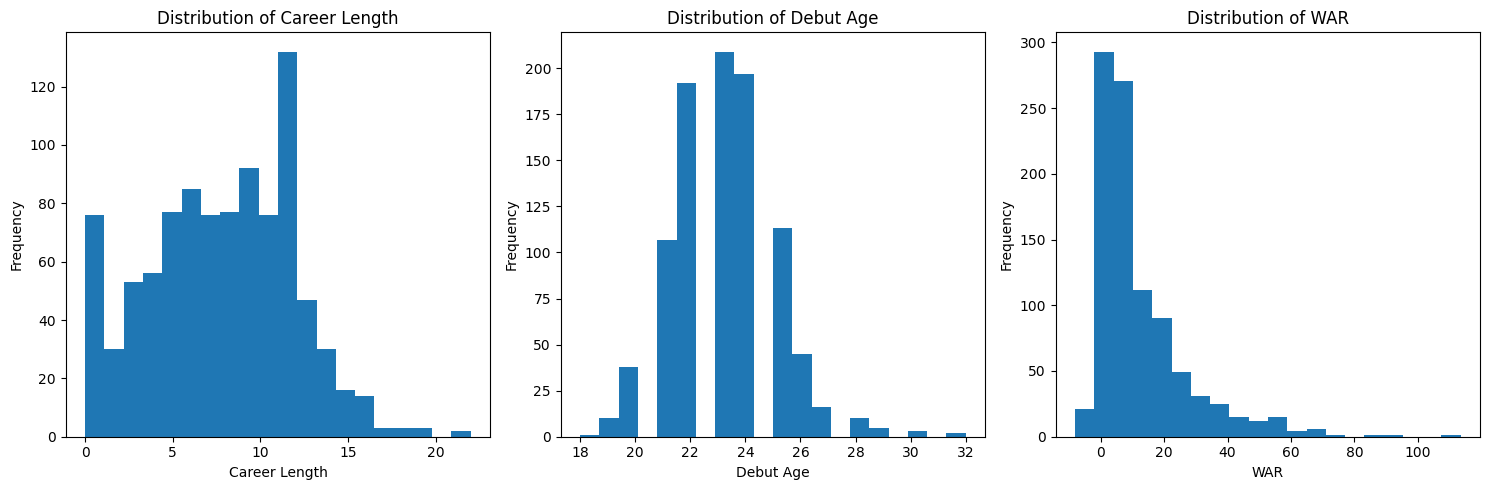

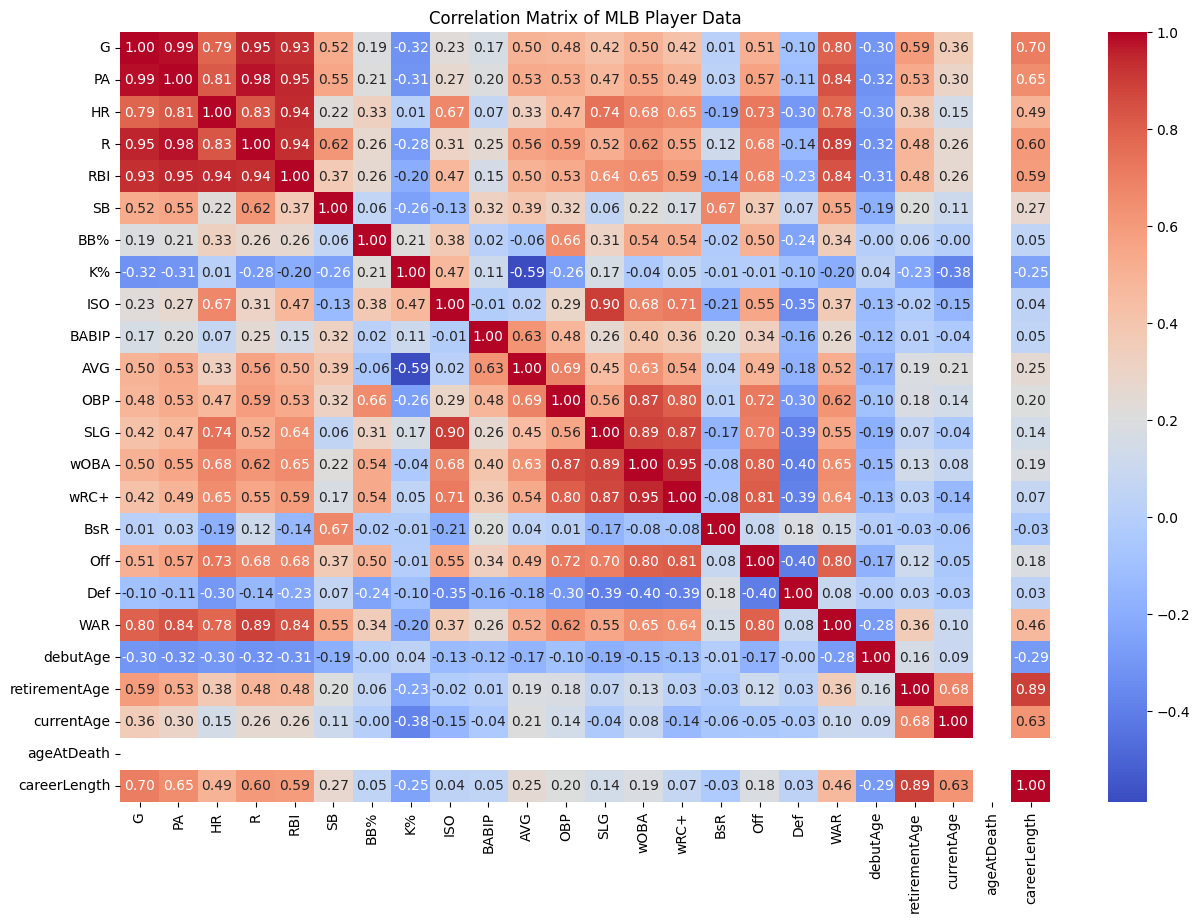

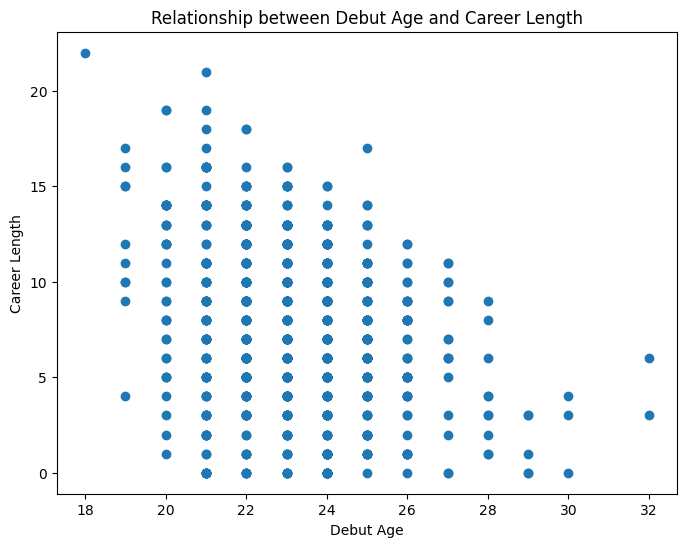

<ipython-input-15-a11c850a8356>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlb_filtered['power_hitter_flag'] = df_mlb_filtered['power_hitter_flag'].astype(int)
<ipython-input-15-a11c850a8356>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlb_filtered['contact_hitter_flag'] = df_mlb_filtered['contact_hitter_flag'].astype(int)


Random Forest - R²: 0.388, RMSE: 3.071
XGBoost - R²: 0.414, RMSE: 3.005
Best Random Forest Hyperparameters: {'max_depth': 5, 'n_estimators': 200}
Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


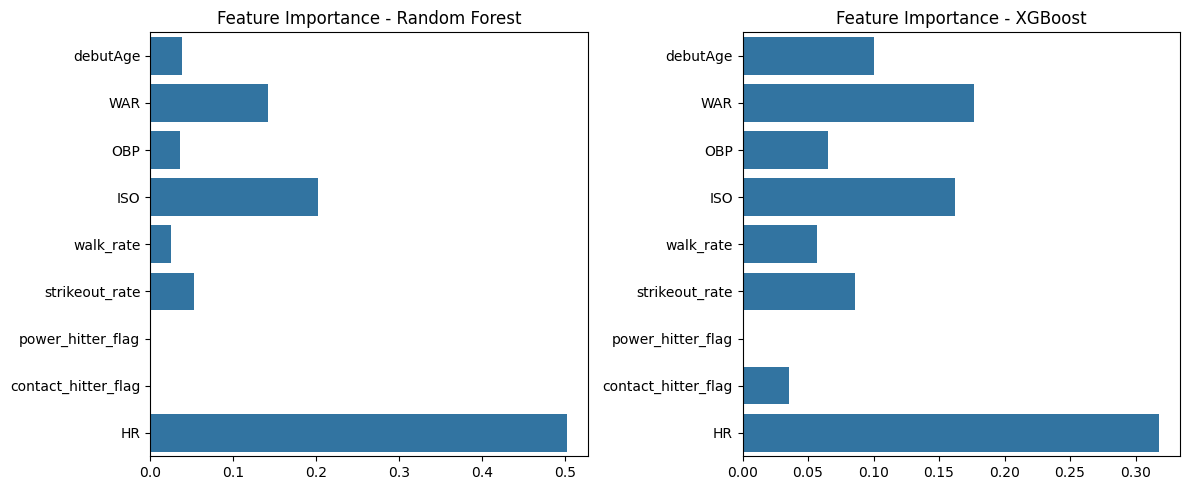

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

df_mlb = pd.read_csv('cleaned_mlb_players_data.csv')

# Distribution of Career Length, Debut Age, and WAR
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df_mlb['careerLength'], bins=20)
plt.xlabel('Career Length')
plt.ylabel('Frequency')
plt.title('Distribution of Career Length')

plt.subplot(1, 3, 2)
plt.hist(df_mlb['debutAge'], bins=20)
plt.xlabel('Debut Age')
plt.ylabel('Frequency')
plt.title('Distribution of Debut Age')

plt.subplot(1, 3, 3)
plt.hist(df_mlb['WAR'], bins=20)
plt.xlabel('WAR')
plt.ylabel('Frequency')
plt.title('Distribution of WAR')

plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df_mlb.drop(columns=["Name"], errors="ignore").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of MLB Player Data')
plt.show()

# Relationship between Debut Age and Career Length
plt.figure(figsize=(8, 6))
plt.scatter(df_mlb['debutAge'], df_mlb['careerLength'])
plt.xlabel('Debut Age')
plt.ylabel('Career Length')
plt.title('Relationship between Debut Age and Career Length')
plt.show()

# Feature Engineering

# power_hitter_flag (Power Hitters have high HR & ISO)
df_mlb['power_hitter_flag'] = (df_mlb['HR'] > df_mlb['HR'].median()) & (df_mlb['ISO'] > df_mlb['ISO'].median())

# contact_hitter_flag (Contact Hitters have high AVG & OBP)
df_mlb['contact_hitter_flag'] = (df_mlb['AVG'] > df_mlb['AVG'].median()) & (df_mlb['OBP'] > df_mlb['OBP'].median())

# walk_rate & strikeout_rate
df_mlb['walk_rate'] = df_mlb['BB%']
df_mlb['strikeout_rate'] = df_mlb['K%']

# Data Preparation

features = ['debutAge', 'WAR', 'OBP', 'ISO', 'walk_rate', 'strikeout_rate', 
            'power_hitter_flag', 'contact_hitter_flag', 'HR']
target = 'careerLength'

df_mlb_filtered = df_mlb.dropna(subset=features + [target])

df_mlb_filtered['power_hitter_flag'] = df_mlb_filtered['power_hitter_flag'].astype(int)
df_mlb_filtered['contact_hitter_flag'] = df_mlb_filtered['contact_hitter_flag'].astype(int)

# Splitting Data into Training and Testing Sets
X = df_mlb_filtered[features]
y = df_mlb_filtered[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_features = ['debutAge', 'WAR', 'OBP', 'ISO', 'walk_rate', 'strikeout_rate', 'HR']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Random Forest & XGBoost

random_forest_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define Parameter Grids for Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# GridSearchCV for Random Forest & XGBoost
grid_search_rf = GridSearchCV(random_forest_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_
best_rf_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)

# Now just the eval part

y_pred_rf = best_rf_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
print(f"Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")
print(f"XGBoost - R²: {r2_xgb:.3f}, RMSE: {rmse_xgb:.3f}")
print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)
print("Best XGBoost Hyperparameters:", grid_search_xgb.best_params_)

# Feature Importance Analysis

rf_feature_importances = best_rf_model.feature_importances_
xgb_feature_importances = best_xgb_model.feature_importances_
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=rf_feature_importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.subplot(1, 2, 2)
sns.barplot(x=xgb_feature_importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

**Analysis of Random Forest and XGBoost Models for MLB Career Longevity**  

- **Random Forest:** R² = 0.388, RMSE = 3.071  
- **XGBoost:** R² = 0.414, RMSE = 3.005  

Both models demonstrate moderate predictive power, but their relatively low R² values indicate that additional variables could improve the analysis.  

**Feature Importance**  

- **Most Influential Features (Both Models)**  
  - **Home Runs (HR):** Strongest predictor of career longevity.  
  - **ISO (Isolated Power):** Highly relevant but slightly weaker than HR.  
  - **WAR (Wins Above Replacement):** Significant but not the most dominant.  
  - **Strikeout Rate (K%):** Players with high strikeout rates tend to have shorter careers.  
  - **On-Base Percentage (OBP):** Less influential compared to power metrics.  

- **Lesser Influential Features**  
  - **Walk Rate (BB%) and Contact Hitter Flag:** Less impact on predicting career length.  
  - **Debut Age:** Older debut ages slightly reduce career length, but the effect is not dominant.  

**Key Takeaways**  

- **Power Hitting Matters:** Players with high home run counts and ISO tend to have longer careers.  
- **Strikeouts Hurt Longevity:** High strikeout rates correlate with shorter career spans.  
- **WAR Alone is Not Enough:** While WAR is influential, it is not the strongest determinant.  
- **Other Factors Needed for Better Predictions:** The relatively low R² suggests missing variables such as injury history, defensive metrics, team changes, and year-to-year performance consistency could enhance predictive accuracy.  

The model performance highlights that while offensive stats are crucial in determining career length, external factors like injuries and defensive capabilities are missing in the dataset. Future studies should incorporate these missing variables for a more comprehensive analysis.  

# Ethics and Privacy

Performing a data-driven examination of Major League Baseball (MLB) career longevity necessitates meticulous attention to ethical issues and possible biases.  During our research, we maintained adherence to ethical data science principles, emphasizing justice, openness, privacy, and responsible data utilization.  This section emphasizes critical ethical considerations, such as dataset biases, privacy issues, and the strategies employed to mitigate potential ethical risks during the study process.

A key ethical problem in our investigation was the possibility of bias in the utilized datasets.  Our analysis utilized publicly accessible biographical and performance data from MLB databases, including Fangraphs and Lahman’s Baseball Database.  These datasets concentrate on players who successfully attained entry into the MLB, so omitting those who have potential but were hindered by institutional obstacles such as racial discrimination, scouting biases, socio-economic constraints, or injury-related impediments.  This survivorship bias may distort our conclusions by disproportionately highlighting the most successful players while neglecting those who encountered external constraints.  To mitigate this, we recognized these biases in our analysis of outcomes and abstained from drawing sweeping generalizations about all baseball players.  Future studies should include data from pre-professional and minor league levels to enhance the knowledge of career paths.

Privacy and adherence to conditions of use were significant concerns in our study.  The utilized data was publicly accessible, indicating it lacked personally identifiable information (PII) or sensitive records.  Nonetheless, ethical dilemmas emerge when utilizing historical player data, as even anonymized datasets may still disclose sensitive patterns pertaining to player contracts, health conditions, or career performance trajectories.  To guarantee adherence to ethical standards, we meticulously followed MLB database usage restrictions, ensuring our analysis did not misuse data beyond its designated research objective.  We refrained from forecasting individual player success or failure in a manner that could facilitate detrimental decision-making, such as contract negotiations devoid of appropriate context.  Our analysis was aggregate-based, concentrating on league-wide patterns instead of focusing on individual players in a manner that could affect their reputation or income.

Bias may also emerge during the analysis and subsequent interpretation phases.  This study examined the statistical correlations among debut age, performance trajectories, and career length; however, it is essential to acknowledge that external factors, such as injuries, team opportunities, or personal situations, affect career outcomes beyond just performance metrics.  Relying exclusively on numerical measurements such as WAR, OBP, and HR rates may cause us to neglect non-quantifiable factors like resilience, adaptability, and leadership qualities, which also influence an athlete's career trajectory.  To identify and address these biases, we employed various statistical approaches (correlation analysis, survival analysis, and machine learning) to cross-validate results and prevent single-metric biases.  Furthermore, we abstained from asserting causative relationships, instead delineating just correlations while recognizing absent variables such as injuries, coaching quality, and socio-economic background that could enhance our study in further research.

In addition to data collection and analysis, we must also evaluate the ethical implications of the application of our findings.  If misconstrued, our findings could be utilized to rationalize prejudiced recruitment practices, wherein organizations concentrate exclusively on early-debut players, disregarding skilled late bloomers.  The improper implementation of our findings may adversely affect contract talks by undervaluing players with unconventional career trajectories or perpetuating historical inequities, like racial or financial obstacles in baseball scouting.  To advocate for the ethical application of our research, we clearly articulated that our results must not be employed for discriminatory decision-making.  Additionally, we advocated for future research that integrates social, economic, and injury-related data to cultivate a more comprehensive understanding of career longevity.  We recommended that teams and analysts utilize contextual player assessments instead of just depending on previous performance trends.

# Discussion and Conclusion

The examination of career duration among Major League Baseball (MLB) hitters yielded significant insights into the determinants of a player's tenure in the league.  Our study examined several facets, including the influence of debut age, temporal performance patterns, skill specialization, and the reliability of essential measurements.  The findings indicated that although younger debut players often experience longer careers, career duration is affected by other factors beyond just age.  Performance indicators including Wins Above Replacement (WAR), On-Base Percentage (OBP), and strikeout rates (K%) substantially influence longevity, underscoring that achievement in MLB necessitates a blend of early career momentum, adaptation, and skill enhancement.

Our findings corroborate prior research indicating that early debut players possess a competitive advantage in lifespan.  Players commencing their careers prior to the age of 20 typically have an average career span of roughly 11 years, while those debuting at 28 or older frequently endure for only a few seasons.  This indicates that younger players are afforded greater developmental opportunities, extended contracts, and sufficient time to acclimate to the league's requirements.  The documented career paths correspond with prior research suggesting that optimal performance for hitters is achieved between the ages of 25 and 31, beyond which the majority of players have a progressive decline.  Nonetheless, we discovered that performance metrics do not deteriorate uniformly—WAR exhibits heightened volatility, OBP maintains stability for an extended period, and home run power (ISO) may endure into the late 30s for exceptional athletes.

A significant revelation was the importance of plate discipline in maintaining prolonged careers.  Players with elevated walk rates (BB%) generally outperformed those with high strikeout rates (K%), underscoring the need of sustaining robust contact and on-base abilities as one ages.  This substantiates the notion that contact hitters maintain more stable careers than power hitters, despite the negligible difference in average career length between the two categories.  Power hitters had greater variability—some experienced brief careers, while others maintained dominance for decades.  This indicates that although raw power is a valuable attribute, it does not reliably forecast career longevity unless accompanied by robust plate discipline.

The survival analysis employing Kaplan-Meier and Cox Proportional Hazards models corroborated these findings.  The models demonstrated that OBP is the most robust predictor of longevity, but a high K% markedly elevates the probability of premature retirement.  WAR, although useful, did not seem to serve as a robust individual predictor, indicating that clubs should prioritize sustained offensive efficiency above comprehensive WAR metrics.  These discoveries have valuable implications for contract negotiations, talent acquisition, and strategic roster planning in professional baseball.

Furthermore, our machine learning models (Random Forest and XGBoost) sought to forecast career duration based on performance criteria.  Although these models recognized debut age, WAR, and OBP as relevant predictors, their predictive efficacy was constrained, indicating that external elements such as injuries, contracts, coaching, and club strategy likely exert a considerable influence on career longevity.  This underscores the necessity for more comprehensive data, encompassing injury history, defensive contributions, and team dynamics, to develop a more robust career projection model.

This study enhances prior baseball analytics research by clarifying the elements that most significantly affect longevity in MLB.  Our findings underscore the significance of debut age, performance consistency, and plate discipline, with practical implications for MLB organizations, commentators, and sports scientists.  Subsequent research may enhance this study by integrating injury data, defensive measures, and player workload statistics to offer a more comprehensive understanding of career sustainability in professional baseball.

# Team Contributions

Everyone contributed and helped each other in almost every domain. The work was divided equally and everyone participated equally in the meetings as well. Overall, we all are extremely happy to have worked with each other. 

- **Hridyanshu**: Exploratory Data Analysis + Discussion and Conclusion + Presentation + Video + Formatting of docs
- **Ellie**: Graphs + Ethics & Privacy + Team Expectations + Timeline + Presentation & its Management + Video
- **Lucas**: Dataset Cleaning & Wrangling + Background and Prior Work + Hypothesis + Presentation + Video
- **Beomsuk**: Hypothesis + Assisted in Ethics & Privacy + Dataset Cleaning+ Presentation + Video